# 类型，值和变量

## 类型，值和变量

javascript 类型分为两大类，**原始类型**，**值类型**

1. 原始类型：number string boolean null undefined symbol
2. 对象类型：除了原始类型之外的其他值

普通的对象时 name 和 value 的无序集合，语言定义了一种特殊的对象：数组，数组时 number 和 value 的有序集合，语言包括一些特殊的语法对于 arrays ，而且 数组有一些特殊的行为，与普通对象区分开。

语言定义了其他很有用的对象类型，`Set` 表示值的集合，`Map` 表示 key 和 value 的映射，`typed array` 有一些特殊的操作，用户处理 bytes 和其他 二进制数据。`RegExp` 处理正则和查询替换，`Date` 处理基本的日期算数，`Error` 和他的父类用于处理一些需要被抛出的异常。

JavaScript 和其他语言的显著区别是，他的 function 和 class 也是特殊的对象类型，可以被代码维护。

JavaScript 有自动垃圾处理机制，当 value 不再被使用时。

JavaScript 支持面向对象的编程风格。

技术上，只有 object 有方法被调用，当时 numbers strings boolean symbol 同样表现为有自己的方法（包装类型），只有 null 和 undefined 时唯一没有方法调用的值。

### Numbers

表示整型，以及真实 number 的近视值，JavaScript 使用 64 位浮点型表示数值，具有表示范围，表示整型也有范围，-2^53 - 2^53 ，如果数字大于这个值，你可能会丢失精度。

当一个 number 直接用于程序中时，被称为数值字面量。

#### 算数

基本：+-*/ 和 ** 。

高级：Math 相关方法

JavaScript 在计算中不会抛错，当时当出现上溢和下溢，除 0 等问题时，结果会时一个特殊的值：`Infinity`。

下溢发生在结果值过于近于 0 以至于小于表示精度，这种情况下结果会返回 0 或者 -0。-0 与 0 几乎没有区别，在很少的情况下才需要区分他们

除 0 在 JavaScript 中并不是一个错误，通常会返回一个 `Infinity` 当时在 0/0 的情况下，会返回一个特殊的值 `NaN` 这个值同样在 infinity/infinity 和非数值类型转为数值类型时发生。

JavaScript 预定义了一些全局常量 `Infinity` 表示无穷大和 `NaN`  来表示非数值，另外在 Number 对象上定义了一些属性常量。

`Nan` 有一些独特之处，无法与任意值做相等，与所有值包括他自己不等。JavaScript 定义了 isNan() 和 isFinite() 来判断值是否是 infinity 或 nan

-0 和 +0 在相等运算时是相等的，这两个值几乎么有区别，只有通过 1/-0 !=1/+0 区分。

JavaScript 数值是接近于 0.1 的近视值，当时实际上他们并不相等，这可能会导致一些问题，比如：


In [1]:
let x = 0.3 - 0.2
let y = 0.2 - 0.1
console.log(x===y) // false

false


#### 使用 BigInt 进行表示任意精度整型

ES2020 引入了一个新的数值类型 BigInt ，用于表现 64 位整型，BigInt 字面量可以用 n 在数字结尾，默认位十进制，当时如果加 0b,0o 或者 0x 前缀，可以改变进制。



In [6]:
const maxInt=BigInt(Number.MAX_SAFE_INTEGER)

In [7]:
console.log(maxInt)

9007199254740991n


In [8]:
let string="1"+"0".repeat(100)

In [9]:
console.log(BigInt(string))

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000n


`BigInt` 在运算方面与 number 一致，但是不能和 number 混用计算。

In [14]:
console.log(3000n/977n)
console.log(1000n+2000n)

3n
3000n


但是比较操作赋，可以混合作用与 Number 类型和 BigInt 类型

In [16]:
console.log(1<2n)

true


In [17]:
console.log(2>1n)

true


In [18]:
console.log(0==0n)

true


In [19]:
console.log(0===0n)

false


按位操作符可以作用于 BitInt 但是 Math 的方法都不可用接受 BigInt 参数

In [20]:
Math.abs(100n)

TypeError: Cannot convert a BigInt value to a number

## 日期和时间

JavaScript 定义了简单的 `Date` 类用于表示日期和时间。JavaScript Date 是一个 object，但是特么也有一个 number 形式的表达 `timestamp` 特指毫秒数，从 1970-01-01 以来

In [3]:
let timestamp = Date.now();
console.log(timestamp)

1642752553809


In [4]:
let now = new Date();
console.log(now)

2022-01-21T08:09:26.992Z


In [5]:
let ms = now.getTime()
console.log(ms)

1642752566992


In [6]:
let iso = now.toISOString()
console.log(iso)

2022-01-21T08:09:26.992Z


Date 类将在后面详细介绍

## Text
在 JavaScript 中表示 text 的类型是 `string`，一个 string 是一个***不可变***有序的 16 位值，每个值表示一个 Unicode 字符。字符串的长度是他所包含的 16 位值的数量。javascript 字符串使用 0 开始的索引：第一个 16 位值在索引为 0 的位置。JavaScript 没有特殊的类型用于表达字符（其他语言中的 char ）如果要表示字符，直接使用单一元素的 string 即可。


<center style="font-size:20px" >字符集，CodePoints 和 JavaScript 字符串</center>

    
 

javascript 使用 UTF-16 编码，JavaScript 字符串是无符号 16-bit 值的队列，普通的使用 Unicode 字符集有一个 codepoints 使用 16 位标识，但是有些字符无法用 16 bit 表示的，会使用两个 16 bit 来表示(surrogate pair)，***这意味着有可能一个 JavaScript 字符串的长度为 2 但是表示的是一个 Unicode 字符***

In [5]:
var euro="€";
var love="👍";
console.log(euro.length);
console.log(love.length);

1
2


大部分处理 string 的方法，处理的嗾使 16 位的值，而不是字符，他们不会特殊对待 surrogate pairs （Surrogate Pair是UTF-16中用於擴展字符而使用的編碼方式，是一種採用四個字節(兩個UTF-16編碼)來表示一個字符）
在 ES6 中，字符是可枚举的，可以使用 for/of 循环或者 `...` 操作符来处理 string，这回作用于实际的字符串，而不是 16 位值

### 字符串字面量

在 JavaScript 中使用字面量，只需要简单的使用单引号,双引号或反引号(`) 包裹，例如

In [ ]:
""
'testing'
"3.14"
`"she said 'hi'",he said`

反引号是 ES6 的特性，允许在字符串中使用 JavaScript 表达。
最初的版本要求字符串只能在一行，在 JavaScript 中很常见使用 + 号拼接的单行字符串。在 ES5 你可以使用反斜线（\）在行末来表示多行字符串，如果需要表示新的一行，可以使用 \n 来表示，在 ES6 的反引号表示法中，换行符是字符串的一部分。

In [1]:
console.log('two\nlines')

two
lines


In [2]:
console.log("one\
long\
line")

onelongline


In [3]:
console.log(`oneline
twoline`)

oneline
twoline


当你使用 ' 来表示字符串时，要注意于英文字符中的引号相区分，可以使用\ 来转义。

### 字符串字面量中的转义序列
反斜线在 JavaScript 中有特殊目的的用途，他用于表示一些字符串没有办法表示的值，例如 \n 表示换行。
另外一个前面提到的例子，\' 可以用来在单引号字符串中表示单引号
可以用三个16进制数字来表示特殊的 Unicode 字符码，例如

In [4]:
console.log("\xA9")

©


同样的 \u 转义可以使用 4 个 16 进制数字来表示需要 4 个 16进制数字表示的 Unicode 字符，例如

In [6]:
console.log("\u03c0")

π


In [7]:
console.log("\u{1f600}")

😀


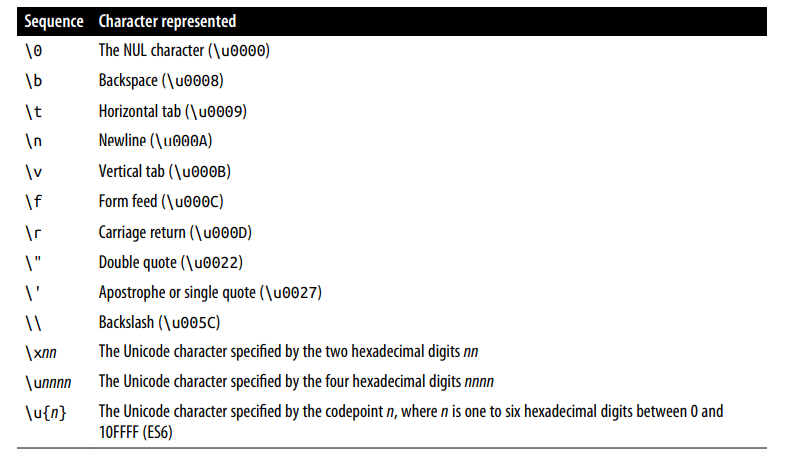

### 使用字符串
使用 + 号拼接字符串

In [8]:
console.log("Hellow,"+"World")

Hellow,World


字符串可以使用 === 和 !== 来比较，如果两个字符串有相同的 16-bit 值则相等，无法使用 <.<=,>,>=操作符，string 的比较回简单比较 16-bit 的值
获取字符串的长度（16-bit 值的数量）可以使用 length 属性

In [11]:
var s="test";
console.log(s.length)

4


除了 length 属性，JavaScript 提供了丰富的 api 来使用字符串
1. 取字符串部分值

In [19]:
s="Hello, world"
s.substring(1,4)

'ell'

In [18]:
s.slice(1,4)

'ell'

In [17]:
s.slice(-3)

'rld'

In [16]:
s.split(",")

[ 'Hello', ' world' ]

2. 字符串查找

In [21]:
s.indexOf("l")

2

In [22]:
s.indexOf("l",3)

3

In [23]:
s.indexOf("zz")

-1

In [24]:
s.lastIndexOf("l")

10

3. ES6 中的返回 Boolean 的查找

In [25]:
s.startsWith("Hell")

true

In [26]:
s.endsWith("!")

false

In [27]:
s.includes("or")

true

4. 创建字符串的修改后版本

In [28]:
s.replace("llo","ya")

'Heya, world'

In [29]:
s.toLowerCase()

'hello, world'

In [30]:
s.toUpperCase()

'HELLO, WORLD'

In [31]:
s.normalize() // es6 后支持，对字符标准化处理

'Hello, world'

In [32]:
s.normalize("NFD")

'Hello, world'

5. 检查字符串的单个字符

In [33]:
s.charAt(0)

'H'

In [35]:
s.charAt(s.length-1)

'd'

In [36]:
s.charCodeAt(0)

72

In [37]:
s.codePointAt(0)

72

6. 字符串扩展

In [39]:
"x".padStart(3)

'  x'

In [40]:
"x".padEnd(3)

'x  '

In [41]:
"x".padStart(3,"*")

'**x'

In [42]:
"x".padEnd(3,"-")

'x--'

7. 去除空格，trim 是 ES5，其他事 ES2019

In [43]:
" test ".trim()

'test'

In [44]:
" test ".trimStart()

'test '

In [47]:
" test ".trimEnd()

' test'

8. 其他字符串方法

In [48]:
s.concat("!")

'Hello, world!'

In [49]:
"<>".repeat(5)

'<><><><><>'

***string 在 JavaScript 中是不可修改的***,方法返回的是一个新的字符串，他们不会去修改原来调用他们的字符串

字符串可以作为只读数组对待，你可以通过索引访问单个字符，而不用使用 charAt 方法

### 模板字面量

在 ES6 和之后，字符串字面量可以使用反引号表示：

In [52]:
s = `hello world`

'hello world'

这不仅是字符串的另一种表示方法，这种方法可以组合 JavaScript 表达式使用，他会计算表达式，然后和其余部分连接在一起

In [53]:
let name = "Bill";
let greeting = `Hello ${name}.`

In [55]:
greeting

'Hello Bill.'

任何在 `${}` 之间的内容会被作为 JavaScript 表达式处理

#### 标签模板字面量

模板字符串字面量一个强大但是少用的特性是，一个函数名(或 tag)可以出现在模板字面量之前，然后这个模板字面量会作为参数，传递给前面这个函数，表达式的值则为函数接收改参数后的返回值。
ES6 有一个内置的 tag function：String.raw() ，他直接 return 这个字符串，而不处理其中任何的转义

In [1]:
`\n`.length

1

In [2]:
String.raw`\n`.length

2

需要注意的是，尽管 tag 部分是一个 function，但是没有用括号来对他进行调用。在这个非常特殊的情况下，反引号其实替代了括号
定义自己的模板 tag 方法是一个强大的特性，这个方法不需要返回一个字符串，他可以作为构造函数使用，就想定义了一种新的语法，我们会在后面看到更多例子

### 模式匹配

JavaScript 定义了一种数据类型 `RegExp` 正则表达式，来描述字符串的匹配模式。 RegExp 不是 JavaScript 的基础类型，但是他们也像 string 和 number 一样有一种字面量表达，因此看上去像是基础类型。正则表达式字面量的表达式是复杂的，并且其 api 也很复杂，后续会完整描述，这里先简述。
在两个斜线之间的内容，被认为是正则表达式的字面量表达。第二个斜线后还可以有一个或其他字符，可以用来改变正则的含义，例如

In [1]:
/^HTML/

/^HTML/

In [2]:
/[1-9][0-9]*/

/[1-9][0-9]*/

In [3]:
/\bjavascript\b/i // 匹配 “javascript” ，大小写敏感

/\bjavascript\b/i

RegExp 定义了大量有用的方法，同时字符串也有接收正则作为参数的方法

In [4]:
let text = "testing: 2, 3, 4";
let pattern = /\d+/g;

In [5]:
pattern.test(text)

true

In [6]:
text.search(pattern)

9

In [7]:
text.match(pattern)

[ '2', '3', '4' ]

In [8]:
text.replace(pattern,"#")

'testing: #, #, #'

In [9]:
text.split(/\D+/)

[ '', '2', '3', '4' ]

## Boolean 值

Boolean 表示真假，这种类型只有两种可能的值，预留词 `true` 和 `false` 表达这两个值。
Boolean 值广泛用于记录比较的结果，例如

In [11]:
4 === 4

true

Boolean 值广泛用于 JavaScript 中的条件控制语句，例如，`if/else` 语句。
像之前讨论的，所有 JavaScript 值可以被转换成 Boolean 值，以下值会被转换为 false

In [13]:
undefined
null
0
-0
NaN
""

''

所有其他值，包括所有的对象和数组，被视为 true
Boolean 值有一个 toString() 方法，可以用来转换成字符串 ”true“ 或 ”false“，但是他们没有任何其他有用的方法，但是有三个重要的 boolean 操作符。

&& 操作符用户表示逻辑和，|| 表示逻辑或，! 表示逻辑非，这些操作在后面细讲。

## null 和 undefined

null 是语言关键词，用于表达一个特殊的值，没有值。对于 null 使用 typeof 操作符会得到一个字符串：”object“

In [15]:
typeof null

'object'

这意味着，null 可以被认为是一个特殊的 object 表示“no object”。在实践中，null 是这个类型中唯一的值，也可以被用于表示 “no value” 对于数字和字符串和对象一样。大部分其他编程语言中，也有类似 JavaScript null 的类型。
JavaScript 也有另外一个表示没有值的值 `undefined` ，表示更深类型的没有值。表示这个变量的值没有被初始化，当你调用对象一个不存在的属性，或者数组不存在的元素而他不存在时，就会返回一个 undefined 。undefined 页会作为一个没有返回值的函数的结果。

In [16]:
typeof undefined

'undefined'

undefined 也是这个类型中的唯一值。
尽管有这些区别，null 和 undefined 同样表示没有值，而且通常是可以互换的，等号操作符会认为他们是相等的

In [17]:
null == undefined

true

适用全等操作符可以区分他们

In [19]:
null === undefined

false

null 和 undefined 都没有任何属性和方法，实际上，对他们使用 . 或者 [] 会抛出 TypeError 的异常

倾向于认为，undefined 用于表示系统层面，非预期的，更像错误的空值，而 null 用于表现程序返回灯预期内的空值。应该避免使用 null 和 undefined，但是如果需要给变量赋值，或者从 function 里返回值，跟倾向于使用 null

## Symbols
Symbols ES6 引入的服务于非字符串属性名。JavaScript 的对象类型是属性的无序集合，每个属性有一个都有一个 name 和一个 value，这个 name 在 es6 之前是典型的字符串，但是在 ES6 之后，Symbols 可以服务于这个目的

In [20]:
strname = "string name";
symname=Symbol("propname");
typeof strname

'string'

In [21]:
typeof symname

'symbol'

In [26]:
o={};
o[strname] = 1;
o[symname] = 2;
o[strname]

1

In [25]:
o[symname]

2

Symbol 没有字面量表达，声明一个 Symbol 值，需要调用 Symbol() 方法，这个方法尽管使用相同的参数也不会返回两个相同的值。这意味着，你可以放心的使用 Symbol 值作为属性，而不用担心覆盖或者重写现有的属性。同样，这种用法，你也可以做为非共享属性使用，这样同样不会担心被其他模块覆盖或重写。

在实践中，symbol 服务于语言扩展方法。当 ES6 介绍 `for/of` 循环和 枚举对象时，需要定义标准的方法，类可以实现这些方法，来让他们变成可枚举。但是如果使用字符串作为标准属性的名称，可能会破坏现有的代码，所以 symbolic name 引入并用于这种目的。在后面我们讲看到，`Symbol.iterator` 是一个 Symbol 值用于方法名，让对象可枚举。

Symbol() 方法接收一个可选的字符串参数，并返回一个唯一的 symbol 值，如果你提供了一个字符串参数，这个参数会在 symbol 值的 tostring 结果中

In [27]:
s = Symbol("sym_x");
s.toString()

'Symbol(sym_x)'

toString 是 Symbol 实例唯一有意义的方法，还有俩个和 symbol 相关的方法你需要知道的。有些时候，你使用 symbol 是为了保护属性私有化，不被修改，但是也有时候，你需要将你的 symbol 值共享出来，让使用者可以重写，像 Symbol.iterator 一样

为了处理这种 case ，JavaScript 定义了一个全局的 Symbol 注册，Symbol.for() 方法接收一个字符串参数，返回一个 Symbol 值，这个值会和字符串参数相关联，如果没有关联过的 symbol 值，则会 new 一个返回，如果存在，则返回原有关联的 symbol 值。同样提供了一个 Symbol.keyFor 方法，用于反查这个字符串参数，

In [28]:
s = Symbol.for("shared")
t = Symbol.for("shared")

Symbol(shared)

In [29]:
s === t

true

In [30]:
s.toString()

'Symbol(shared)'

In [31]:
Symbol.keyFor(t)

'shared'

## 全局对象
`global object`是一个常规的 JavaScript 对象，服务于一个重要的目的，这个对象的属性是全局的，可以在 JavaScript 程序中用到。当 JavaScript 解释器开始运行（或者浏览器页面开始加载），会创建一个新的全局对象，并且赋予一个默认值，包括了一下属性

- 全局常量，像 undefined，Infinity 和 NaN
- 全部函数，像 isNaN(), parsetInt() 和 eval()
- 构造函数，像 Date(), RegExp(), Object() 和 Array()
- 全局对象，像 Math 和 JSON

global 对象的属性并不是预留值，但是你应该把他们作为预留值对待，这里会介绍一些全局对象的属性，更多会在后面覆盖。

在 Node 中，全局对象有一个属性"global" 这个属性的值，指向 全局对象本身，所以你可以通过 global 来访问全局对象，在 node 程序中。

在 web browsers 中，Window 对象作为全局对象，在所有浏览器端运行的 JavaScript 代码中被访问，全局的 Window 对象有一个自引用的属性 window ，这个属性指向全局对象。这个 Window 类的对象，不仅定义了核心的全局属性，而且也定义了一些用户浏览器和客户端 JavaScript 的特殊属性。web worker 线程有一个不同而且独立的全局对象，worker 内的代码可以使用 self 来访问他的全局对象。

ES2020 定义了一个 globalThis 作为访问全局对象的标准方式，在 2020 这个特性已经被所有的现代浏览器和 Node 实现

## 不可变的原始类型和可变的对象引用


在 JavaScript 中原始类型(undefined,null,booleans,numbers,strings)和对象(include arrays and functions)类型的一个本质区别是：原始类型是不可修改的，没有途径修改一个原始类型的值，对于 bool 和 number 是显而易见的，改变 number 的值没有意义，但是对 string 可能会有些疑问，string 表现的更新是 char 的数组，你可能希望修改指定索引的 char ，但实际上，在 JavaScript 中，所以对 string 的操作，返回的都是一个新的 string。

In [32]:
s = "hello";
s.toUpperCase()

'HELLO'

In [33]:
s

'hello'

原始类型的比较是基于值的，对于 string ，只有具有相同长度，而且每个 index 的字符相同，才认为是相等的。

对象的比较和原始类型不同，首先他们是可以修改的，他们的值可以变

In [34]:
o = {x:1};
o.x=2;
o.y=3;
o

{ x: 2, y: 3 }

In [35]:
a=[1,2,3];
a[0]=0;
a[3]=4;
a

[ 0, 2, 3, 4 ]

对象不是基于值的比较，两个不同的对象尽管有相同的属性和值，也不会认为是相等的，同样数组尽管有相同的元素和相同的顺序，也不会认为是相等的。

对象的比较是基于***引用***的比较，可以认为对象的值是一个引用，我们比较的是这个引用，两个对象相同只有当他们有相同的引用时

In [36]:
a=[];
b=a;
b[0]=1;
a[0]

1

In [37]:
a === b

true

分配一个对象给一个变量，只是简单的赋值了引用，而不会创建这个对象的新副本，如果你想要这个对象的新副本，你需要显式复制这个对象的属性

In [38]:
a = ["a","b","c"];
b=[];
for(let i=0;i<a.length;i++){
    b[i]=a[i];
}
c = Array.from(b) // ES6,复制数组的方法

[ 'a', 'b', 'c' ]

同样的，如果你需要比较两个不同的对象，你也需要比较他们的属性，如：

In [41]:
function equalArrays(a,b){
    if(a === b) return true;
    if(a.length !== b.length) return false;
    for(let i=0;i<a.length;i++){
        if(a[i]!==b[i]) return false;
    }
    return true;
}

## 类型转换
JavaScript 在处理类型和值时非常灵活。当JavaScript 期望一个 bool 值时，你可以提供一个任意类型的值，JavaScript 会根据需要来转换它。一些值被转换成 true 而其他值转换成 false。对于其他类型也是相同的逻辑：如果 JavaScript 期望一个 string 你同样可以给他任意值。

In [42]:
10 + " objects"

'10 objects'

In [43]:
"7" * "4"

28

In [44]:
n = 1 - "x"

NaN

In [45]:
n + " objects"

'NaN objects'

下图时类型转换规则

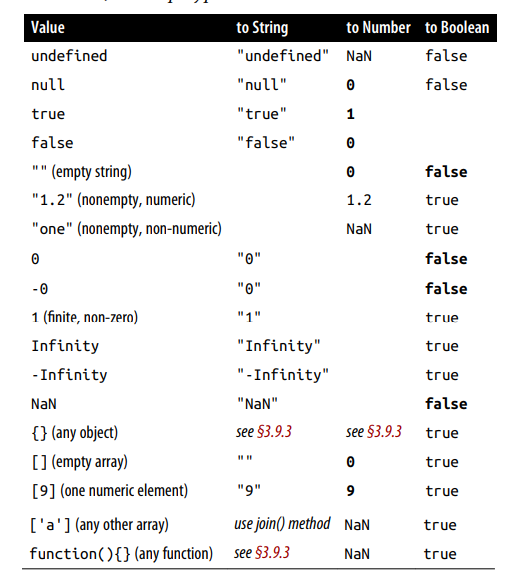

上表展示了 原始类型到原始类型的转换规则，boolean 的转换之前已经提过。

- 转换成 string：所有原始类型转换成 string 已经被定义过。
- 转换成 number：能被转换成 number 的 string 将会被转换，其他会被转换成 NaN，有些转换可能会有些意外，比如 true 转换成 1 ，false 和 空字符串转换成 2
- Object 转换成原始类型：略复杂，后续解释

### 转换和相等
JavaScript 有两个操作符来定义值是否相等，`===` 和 `==` ，=== 对不同类型的值，不会认为时相等，在代码中应该使用这种相等。考虑 JavaScript 的灵活性，也定义了 == 操作符来灵活的处理相等，一下比较会认为时相等的。

In [46]:
null == undefined

true

In [47]:
"0" == 0

true

In [48]:
"0" == false

true

后面会解释 == 操作判断两个值是否相等的细节。

需要注意的是，一个值可以转换成另一个值，不代表他们是相等的。undefined 用在期望 bool 的地方时，会被转换成 false，但是这不意味着 undefined == false 

In [49]:
undefined == false

false

JavaScript 操作符和语句会转化变量类型位期望的类型，例如 if 转换 undefined 为 false，但是 == 操作不会试图去转换两边的值为 booleans

### 显式转换

尽管 JavaScript 对许多类型做了自动转换，但是你可能倾向于显式的转换，来保证你的代码更加具有确定性。

最简单的显示转换方式是使用 Boolean(), Number() 和 string()

In [51]:
Number("3")

3

In [52]:
String(false)

'false'

In [53]:
Boolean([])

true

除了 null 和 undefined ，其他值都有 toString() 方法，这个方法的结果通常和显式转换 String() 的结果相同，

同时需要注意的是，Boolean(), Number(), 和 String() 方法同样可以被 new 调用作为构造函数使用。如果你用这种方式来使用，你会得到一个“包装”对象，这个对象的行为和原始的 boolean，number，string 相同，这个对象是为了兼容之前的 JavaScript 版本，当前如果没有合理的理由，不建议使用。

因 JavaScript 操作符会隐式转换类型，因此有些时候，操作符被用于一些出于显式类型转换目的的场景

In [55]:
x = 1;
x + ""

'1'

In [56]:
+ x

1

In [57]:
x - 0

1

In [58]:
!!x

true

格式化和处理 number 是常规的计算任务，JavaScript 定义了一些特殊的函数和方法来对 number-to-string 和 string-to-number 转换提供更细节的控制。

number 的 toString 方法提供了一个可选参数，可以指定转换基于的进制，如果不指定，默认是十进制，但是你也可以转换成其他进制，例如 2 或者 36

In [60]:
n = 17
"0b" + n.toString(2)

'0b10001'

In [61]:
"0o" + n.toString(8)

'0o21'

In [62]:
"0x" + n.toString(16)

'0x11'

当处理金融或者科学计算的数据时，你可能想指定 number 转换成 string 的方式，例如控制精度和科学计数法。

Number 类定义了三个方法用于处理这些转换，
- toFixed() 转换 number 为 string，在小数点后固定位数，这种不会使用科学计数法表达。
- toExponential() 使用科学计数法转换 number 为 string 
- toPrecision() 转换 number 为 string 使用限制的位数，当要表达的 number 过大，无法用指定位数的数字表示时，会使用科学计数法表示。

In [64]:
n = 123456.789;

123456.789

In [65]:
n.toFixed(0)

'123457'

In [66]:
n.toFixed(2)

'123456.79'

In [67]:
n.toFixed(5)

'123456.78900'

In [69]:
n.toExponential(1)

'1.2e+5'

In [70]:
n.toExponential(3)

'1.235e+5'

In [72]:
n.toPrecision(4)

'1.235e+5'

In [73]:
n.toPrecision(7)

'123456.8'

In [74]:
n.toPrecision(10)

'123456.7890'

除了以上这些方法，类 Intl.NumberFormat 定义了更多，更常见的 number formatting 方法。

如果你传递一个 string 给 Number() 方法，体会试图转换这个 string 为 int 或者 float，这个方法仅对十进制有效，而且不允许尾随字符。parseInt() 和 parseFloat() 方法（全局方法不是任何 class 的方法）则更加灵活。parseInt() 仅转换 int 而 parseFloat() 既转换 int 也转换 float。如果字符串使用"0x" 或者 “0X” 开头，parseInt() 会将他们作为 16进制数来吹了。无论是 parseInt 还是 parseFloat 都会跳过开头的 空白字符，尽可能的转换等多的数字字符，而忽略其他剩下的字符。如果第一个非空字符不能作为有效数字字面量的一部分，则返回 NaN

In [75]:
parseInt("3 blind mice")

3

In [76]:
parseFloat("  3.14 meters")

3.14

In [77]:
parseInt("-12.24")

-12

In [78]:
parseInt("0xFF")

255

In [79]:
parseInt("-0xFF")

-255

In [80]:
parseFloat(.1)

0.1

In [81]:
parseInt("0.1")

0

In [82]:
parseInt(".1")

NaN

In [83]:
parseFloat("$72.47")

NaN

parseInt() 接收一个可选的第二个参数，用于指定进制，合法数据访问在 2 到 36 之间

In [85]:
parseInt("11", 2)

3

In [87]:
parseInt("ff", 16)

255

In [89]:
parseInt("zz",36)

1295

In [90]:
parseInt("077",8)

63

In [91]:
parseInt("077",10)

77

### 对象到原始类型的转换
前面我们解释了原始类型之间的显式转换，这里我们将介绍对象类型到原始类型的转换规则。

JavaScript 对象转换成原始类型的复杂之处在于，有些对象不仅只有一种有意义的原始表达。例如 Date 类型，可以使用 string 呈现，也可以使用 number 呈现

JavaScript 规范定义了三种基本算法，用于 object 到 原始值类型的转换

- prefer-string:如果能转换成 string ，则转换为 string
- prefer-number:如果能转换成 number，则转换成 number
- no-preference:表示没有转换倾向，类可以自定义转换规则。对于所有的内置 JavaScript 类型，除了 Date 是 prefer-string 其他都是 prefer-number


1. 对象到 boolean 的转换：所有的对象都转换成 true，注意这个转换不会用到上面面试的 object-to-primitive 算法，而且这对所有的对象有效，包括空数组，甚至是包装对象 new Boolean(false)



2. 对象到 string 的转换：当对象需要被转换成 string 时，会先使用 prefer-string 算法对 object 进行转换，然后按照前表的映射，将这个原始值转换成 string。

3. 对象到 number 的转换：当要给对象需要被转换成 number 时，JavaScript 会使用 prefer-number 算法先转换成原始类型，然后再将原始类型转换成 number

### 特殊的操作符转换

这里将解释，有些特殊情况下，操作符的转换不会使用基本的 object-to-string 和 object-to-number 转换。
   - +号操作符用于处理 number 的相加，和字符串的拼接，如果加号两边任意存在 object，JavaScript 会使用 no-preference 将他们转换成原始类型。一旦拥有两个原始类型，将检查原始类型的类型，如果有一个时 string，则转换另一个为 string，然后做拼接，否则转换两边为 number 后进行相加
   - 对于 == 和 != 操作符，会进行在忽略类型的层面上进行比较，如果一边是 object 另外一边是 原始类型，这些操作符会使用 no-preferenct 将他们转换成原始类型，然后比较这两个原始类型
   - 最后，对于 <,<=,>和>=的比较，如果两边存在 object ，则会使用 prefer-number 进行转换，需要注意的是，会直接比较转换后的值，而不会将这个值再次转换成 number 再比较
    
   注意，number 表达的 Date 对象，再比较是更有意义，而 string 表达的 Date 对象则不，所以，实际上，JavaScript 使用 prefer-number 来转换，意味着，我们可以直接比较 Date object

### toString 和 valueOf 方法

所有的对象都实现了两种转换方法，用于 object-to-primitive ，在我们解释 prefer-string,prefer-number 和 no-preference 转换之前，我们先解释下这两个方法

第一个方法是 toString(), 他的功能是返回对象的 string 表达，默认的 toString 方法的返回并没有什么意义

In [1]:
({x: 1,y:2}).toString()

'[object Object]'

很多类定义了特殊的 toString 方法，例如 Array 的toString，会返回逗号分割的元素

In [2]:
[1,2,3,4,5].toString()

'1,2,3,4,5'

function 定义的 toString 返回定义函数的字符串

In [3]:
function test(){
    let a=1;
    let b=2;
    return a+b;
}
test.toString()

'function test(){\n    let a=1;\n    let b=2;\n    return a+b;\n}'

正则的 toString 返回可读的正则字面量

In [5]:
/\d+/g.toString()

'/\\d+/g'

日期的 toString 返回可读的日期

In [6]:
(new Date(2020,0,1)).toString()

'Wed Jan 01 2020 00:00:00 GMT+0000 (Coordinated Universal Time)'

另外一个对象转换方法是 valueOf，相对来说，这个方法并不好定义：他支持将一个对象转换成能表达他的原始值，但是大部分对象都没有办法用单一的原始值来表示，因此默认的 valueOf() 方法简单返回这个 object 自己，而不是原始值。包装类（String,Number,Boolean）定义的 valueOf 方法，简单的返回被包装的原始值。Array,function 和 regex 简单的实现了默认的 valudOf 方法，调用这些类型的 valueOf 会返回这个对象本身。Date 定义的 valueOf 方法会返回时间戳。

In [7]:
(new Date(2020,0,1)).valueOf()

1577836800000

### 对象到原始类型转换算法

解释完 toString 和 valueOf 后，我们再解释一下这三个 object-to-primitive 算法是如何工作的
- prefer-string 首先调用 toString() 方法，如果这个方法有定义并且返回一个原始值，则使用这个原始值（尽管这个原始值可能不是 string），如果 toString 方法不存在或者返回一个 object，JavaScript 会尝试 valueOf 方法，如果存在且返回原始值，则用这个值，否则转换将抛出 TypeError
- prefer-number 与 prefer-string 类似，但是会先调用 valueOf 方法然后再调用 stringOf 方法。
- no-preference 依赖对象定义的类，如果对象是 Date 则使用 prefer-string，对于其他的，将使用 prefer-number 。

在结束这个话提前，我们可以讨论一下 prefer-number 的细节，为什么空 array 转换成 0 而单元素的 arrays 可以转换成数组

In [9]:
Number([])

0

In [10]:
Number([9])

9

In [12]:
Number(['1'])

1

In [13]:
Number(['1','2'])

NaN

object-to-number 会先使用 prefer-number 将对象转换成原始值，这是会调用数组的valueOf 方法，而数组的 valueOf 是使用的默认定义，因此返回数组本身，当 JavaScript 发现不是原始值时，将调用 toString 方法，数组的 toString 方法有很好的定义，会返回逗号分割的数组元素的字符串，这是得到了一个原始值，转换借宿，这个 string 的原始值作为 Number 的参数，因此有了上面的结果。

## 变量声明和赋值

变量让我们可以使用 name 或 标识符 来表示值，给 name 绑定一个值，帮助我们在程序中引用这个值。如果我们赋予变量一个不会改变的值，则称之为常量

在 ES6 之后，通常使用 let 或者 const 关键词，在 ES6 之前，通常使用 var, 这个关键词会有些混淆，我们在后面解释。

### 使用 let 和 const 声明变量

在现代 JavaScript （ES6 以及以后），变量使用 let 关键词声明

In [17]:
()=>{
let i;
let sum;
};

[Function (anonymous)]

也可以一次声明多个变量

In [18]:
()=>{
    let i,sum ;
}

[Function (anonymous)]

一个好的编程实践时在声明变量时尽可能的赋予初始值

In [19]:
()=>{
    let message = "hello";
    let i=0,j=0,k=0;
    let x=2,y=x*x; 
}

[Function (anonymous)]

如果没有指定变量的初始值，这个变量也会被声明，但是他的值是 undefined 直到你的代码赋值给他

当声明一个常量时，可以使用 const 关键字，const 和 let 相似，但是你在声明时，必须初始化他。

In [21]:
()=>{
    const H0 = 4;
    const C = 29999.123
    const AU = 1.234E8
}

[Function (anonymous)]

常量不可以被修改，所有试图修改常量的操作，将会抛出 TypeError。

常用的习惯是使用全大写来表示常量，例如 `HTTP_NOT_FOUND` 来与普通变量做区分。

> 

> 何时使用 const
关于使用常量，有两种学院派的做法，一种是只有内置不会改变的值，使用常量。另外一种是代码中所有变量都使用常量，当你需要修改时，再修改声明为 let  一种认为只有完全不能被修改的才定义成常量，另一种是所有值都应该被定义为常量。

后面我们将见到JavaScript 中的 for,for/in 和 for/of 循环语句，每种循环语句都包括一个循环变量，JavaScript 允许我们将循环变量作为循环语法的一部分使用，这是 let 另外一种常用的方式

In [23]:
data=[1,2,3]
for(let i=0,len=data.length;i<len;i++) console.log([i])

[ 0 ]
[ 1 ]
[ 2 ]


In [24]:
for(let datum of data) console.log(datum)

1
2
3


In [25]:
for(let property in data) console.log(property)

0
1
2


const 也可以用于循环语句中，如果变量不会被赋予新的值

In [26]:
for(const datum of data) console.log(datum);

1
2
3


In [27]:
for(const property in data) console.log(property);

0
1
2


### 变量和常量的作用域


变量作用域是源代码的一段区域，在这个区域该变量被定义。使用 let 和 const 定义的变量拥有块级作用域，这意味着，他们仅在定义他们的代码块中有定义。JavaScript class,function,if/else,while,for等都是块级的。粗暴的说，如果变量定义在{}中，那么变量只在其中具有声明和定义。变量或常量作为循环语句的一部分（for,for/in,for/of） 声明的，作用域为循环体，尽管定义出现在 {} 之外。

当一个变量定义在最顶级，在所有都代码块之外，我们称这个全局变量有全局作用域，在 node 和 client-side JavaScript modules 中，全局变量的作用域，是这个定义他的文件。在传统的 client-side JavaScript 中，全局变量的作用域是定义它的 HTML 文档，如果一个 <script> 声明了一个全局变量，那这个变量将在左右的 <script> 中可以使用

### 重复声明

重复声明变量，会报一个语法错误。

### 声明和类型

在静态类型语言中像 C 或 Java 中，在声明变量是，首先想到的可能是设定一个类型，然后再赋值，但是在 JavaScript 中，变量声明不需要定义类型，一个 JavaScript 变量可以被赋予任何类型的值。例如给一个变量赋 number 后再赋 string，完全是合法的，但是这并不是一种很好的编程实践。

### 使用 var 声明变量

在 ES6 之前的 JavaScript 版本里，除了 var 没有其他的办法声明变量，var 的语法与 let 类似

尽管 var 与 let 有相同的语法，但是他们的工作方式却有重要的差异：
 - 使用 var 声明的变量，没有块级作用域，他们作用于定义他们的函数，无论他们的定义在这里函数的多么里面
 - 如果你在函数体外面使用 var，这样会声明一个全局变量，但是使用 var 声明的全局变量和 let 声明的有重要的区别，var 声明的全局变量实际上是在 globalThis 上新增了一个属性。在函数体外写 var x = 2 等同于 globalThis.x = 2，而且这个属性不能使用 delete 操作符删除。而使用 let 或者 const 声明的全局变量，不会修改 global object。
 - 不像使用 let 声明的变量，var 是可以多次重复声明变量的。因为 var 变量有函数作用域而不是块级作用域，这种重声明也很常见。多个 for(var i =0;...实际上每个 loop 都在对同一个变量重新声明和初始化。
 - var 不寻常的一个特性是 `hoisting`，当一个变量被定义是，他实际上会被举升到函数的开头声明，而赋值仍保留在你写他的位置。因此，在整个函数体内 var 声明的变量都可以被访问，而不会报错，初始化之前会是一个 undefined。这个特性可能会导致一些奇怪的 BUG 因此，let 修复了这个点。


> 使用未声明的变量
在严格模式中，当你试图使用为声明的变量时，会得到一个引用错误，而在严格模式外，如果你赋值给一个未声明的变量，会自动创建一个全局的变量。在代码的任意地方都可以使用或访问，这通常会导致 BUG，所以最好使用严格模式。
var 可以传创建全局变量，但是与 var 创建的变量不同的时，这种意外创建的全局变量可以使用 delete 删除。

### 解构赋值

ES6 实现了一种组合声明和赋值的语法`解构赋值`，在解构赋值中，右侧是一个结构化的对象，左侧是一个或多个变量，使用数组或对象字面量语法。

In [32]:
(()=>{
    let [x,y]=[1,2];
    [x,y]=[x+1,y+1];
    [x,y]=[y,x];
    return [x,y]
})()

[ 3, 2 ]

In [33]:
Object.entries({x:1,y:2})

[ [ 'x', 1 ], [ 'y', 2 ] ]

可以这样遍历对象

In [36]:
(()=>{
    let o = {x:1,y:2};
    for(const [name,value] of Object.entries(o)){
        console.log(name,value)
    }
})()

x 1
y 2


当左右数量不对等时

In [41]:
[x,y]=[1];
[x,y]

[ 1, undefined ]

In [39]:
[x,y]=[1,2,3];
[x,y]

[ 1, 2 ]

In [42]:
[,x,,y]=[1,2,3,4];
[x,y]

[ 2, 4 ]

如果想使用剩下未使用的值

In [43]:
[x,...y]=[1,2,3,4];
[x,y]

[ 1, [ 2, 3, 4 ] ]

这种方式，可以把传递给函数的其他参数，整合成单个数组。
结构赋值也可用于嵌套数组

In [44]:
let [a,[b,c]]=[1,[2,3.4],3];
[a,b,c]

[ 1, 2, 3.4 ]

解构赋值的强大之处在于，被结构对象完全不需要时 array ，可以使用任务 iterable 对象在右侧，这可以在循环语句中使用。

In [46]:
[first,...rest]="hello";
[first,rest]

[ 'h', [ 'e', 'l', 'l', 'o' ] ]

解构赋值在右侧时一个 object 时，也可以使用，左侧看上去更像一个对象字面量

In [49]:
(()=>{
   let transparent={r:0.0,g:0.0,b:0.0,a:1.0};
    let {r,g,b}=transparent;
    return {r,g,b}
})()

{ r: 0, g: 0, b: 0 }

## 总结
本节应该被记住的重点
- 在 JavaScript 中如何维护 number，string。
- JavaScript 中剩余的原始类型如何工作：booleans,Symbols,null and undefined。
- 不可修改的原始类型和和可修改的引用类型之间的差异
- JavaScript 如何做隐式的类型转换，以及如何显示的实现相同的转换
- 如何初始化和声明常量和变量（包括结构赋值）以及变量和常量的作用域

# 表达式和操作符
这里梳理了 JavaScript 中的表达式和操作符。***表达式*** 是一段可以计算并产生一个值的 JavaScript 代码，一个常量的字面量就是一个简单的表达式，变量名也是一个简单的表达式，复杂表达式可以由简单表达式组合而来，
最常见的构造复杂表达式的方法是使用操作符，一个操作符作用与符号两边的值，然后通过某种方式计算得到一个新的值。操作符 `*` 是一个简单的例子。
本节梳理了 JavaScript 所有的操作符，如果你已经有过 C 语言的经验，大部分 JavaScript 的表达式语法都相似。

## 原始表达式
最简单的表达式，也就是原始表达式，不包括任何简单表达式的表达式。

在 JavaScript 中，原始表达式就是 常量，字面量值，确定的语言关键字和变量引用

字面量是直接在程序中使用的常量值，例如：

In [52]:
1.23;
"HELLO";
/pattern/;

/pattern/

有些 JavaScript 的保留字也是原始表达式

In [54]:
true;
false;
this;
null;


null

与 true,false,null 不同的是，`this` 并不是一个常量，在程序不同的地方，可能会有不同的值。this 关键字来源于面向对象编程，在函数体中使用 this ，通常指向调用这个函数的对象，后续会详细讲解 this

最后，第三种类型的原始表达式是指向变量，常量或者 global 对象的属性。

当任何标识符出现在程序中时，JavaScript 会假设这是一个常量或者变量或者 global 对象的属性，然后寻找它的值，如果没有找到，将会抛出引用错误的异常。

## 对象和数组初始化

对象和数组初始化也是表达式，表达式的值是一个新创建的数组或者对象，这些初始化表达式也称之为对象字面量或者数组字面量，然而他们并不是原始表达式，因为他们包括了一些子表达式，作为元素或者属性的值，

数组初始化是逗号分隔的，使用方括号包裹的表达式列表


In [56]:
[];
[1+2,3+4]

[ 3, 7 ]

每个元素也可以是一个数组初始化表达式，也就是可以创建嵌套的数组：

In [58]:
let matrix = [ [1,2,3], [4,5,6], [7,8,9]];

元素的表达式会在数组初始化时被计算，这意味着同一个数组初始化表达式的值，在每次计算时可能不相等

undefined 也可以用在数组字面量中，可以简单逗号留白，例如：

In [ ]:
let sparseArray = [1,,,,5]

对象初始化表达式，与数组初始化表达式类似，但是方括号需要替换成花括号，而且每个字表达式前，有一个属性名和 `:` 例如：

In [59]:
let rectangle = {
    upperLeft: {x: 2, y: 2},
    lowerRight: {x: 4, y: 5}
}

在后面将会更加详细的说明对象和数组的初始化

## 函数定义表达式

函数定义表达式 定义了一个 JavaScript 函数，这种表达式的值返回的是一个新定义的函数，在某种意义上，一个函数定义表达式也称为 `函数字面量` 类似于对象初始化同样可以被称为 `对象字面量` 。一个函数定义表达式通常包括 function 关键字，和逗号分隔的，零个或多个逗号分隔的标识符，以及花括号包括的函数体。例如：

In [ ]:
let square = function(x){ return x*x;};

函数也能使用函数名称的函数声明而不是函数表达式来定义，而在 ES6 以及以后，可以使用隐式的匿名函数语法，后面有更多的细节。

## 属性访问表达式

属性访问表达式，用户计算对象的属性值，或者一个数组元素，JavaScript 定义了下面两种属性访问表达式语法：

> expression . identifier 和
  expression [expression]

1. 第一种风格，使用点号，加上标识符的形式，这种仅限于对象类型，而且标识符需要时期望属性的名字。
2. 第二种属性访问风格是在对象或数组后使用方括号，方括号内包含另外一个表达式。方括号的表达式，是期望访问的对象属性名，或者期望访问的数组元素索引值。

In [66]:
(()=>{
    let o = {x: 1,y: {z: 3}};
    let a = [o, 4, [5, 6]];
    console.log(o.x);
    console.log(o.y.z);
    console.log(o["x"]);
    console.log(a[1]);
    console.log(a[2]["1"]);
    console.log(a[0].x);
})()

1
3
1
4
6
1


两种类型的属性访问表达式，都会先计算 `.` 或者 `[` 前面的表达式值，如果这个表达式的值时 null 或者 undefined ，属性访问则会抛出一个类型错误的异常，因为这两个 JavaScript 值没有属性。

如果对象表达后有 `.` 和一个标识符，这个标识符命名的属性名称的值将会是这个表达式的值。

如果对象后有 `[` 包裹的另外一个表达式，这个被包裹的表达式会先被计算并转换成 string 。整个表达式的值，会是这个 string 作为属性名，在对象中的值

如果对象没有这个属性，则表达式的值会是 undefined

`.` 号属性访问符语法是在两种方式中是，更简单的一种的，但是需要注意的是，这尽在属性名是合法标识符的情况下，如果属性名包括空格，或者标点或者 number ，则只能用 `[` 表示。`[` 也常用于当被访问的属性不是静态的，而是某些计算的结果时

## 条件属性访问

ES2020 新增了两种访问属性的表达式：

```
expression ?. identifier
expression ?. [ expression ]
```

这种也称可选链，一般对 undefined 或者 null 使用属性访问表达式，会抛出异常，使用 ?. 可选链表达式来访问，则不会抛出异常，而是返回 undefined 作为表达式的结果。

条件属性访问表达式时 JavaScript 的新特性，在 2020 早期，这个新语法特效已经被大部分主流浏览器支持

## 函数调用表达式

一个 `函数调用表达式` 是一个执行函数或方法的 JavaScript 语法，函数表达式（定义了被调用的函数）加上 `(` 以及 0 个或多个逗号分隔的参数表达式。

```
f(0)
Math.max(x,y,z)
a.sort()
```

当调用发生时。
1. 优先计算函数表达式。
2. 然后计算参数表达式，得到一个参数列表。
3. 如果计算的到的函数表达式并不是一个函数，则会抛出一个类型错误。
4. 参数值会按顺序赋给接受参数的标识符。
5. 执行函数体，如果函数使用了返回预计返回一个值，这个值会成为调用表达式的值。如果没有 reture 语句，函数表达式的值会是 undefined



每个调用表达式在括号之前都有一个表达式，如果这个表达式时一个属性访问表达式，那么这个调用称为方法调用。在方法调用中，属性访问表达式的目标，会成为函数体中，this 关键字指向的值。

## 条件调用

在 ES2020 中，你也可以使用 ?.() 代替 () ，通常当你调用一个函数时，如果这个表达式左边的是 null 或者 undefined 或者其他非函数，则会抛出类型错误。使用新的 ?.() 语法调用，表达式会返回一个 undefined 而不是抛出类型错误。

数组对象有一个 sort 方法，接受第二个可选的函数参数，定义了如果判断数组元素顺序。在 ES2020 之前，如果你想写一个类似 sort 的方法，你需要先判断函数参数是否存在

In [1]:
function square(x, log){
    if(log) {
        log(x);
    }
    return x * x;
}

在 ES2020 之后，你可以简单使用 ?.()。这仅会在方法存在时调用。

In [ ]:
function square(x, log){
    log?.(x);
    return x * x;
}

需要注意的是，?.() 仅会检查表达式是否是 undefined 或者 null ，而不会检查是否真的是函数，因此，如果传入的参数是两个数字，仍然有可能抛出异常。

于条件访问表达式一样，条件调用表达式也有短路机制，如果 ?. 表达式左边的表达式是 null 或者 undefined ，则括号内的参数表达式也不会被计算。

条件调用也是 JavaScript 的新特性，在 2020 早起，大部分浏览器已支持该特性。

## 对象创建表达式

对象创建表达式，创建一个新对象，而且调用一个函数（构造函数）来初始化这个对象的属性，对象创建表达式像普通的表达式一样，但是会有一个前置关键字 new

In [3]:
new Object();

{}

如果没有参数传递给构造函数，则空括号可以被省略

In [5]:
new Object

{}

对象表达式的值，会创建一个新对象，构造函数会在后面详细解释。

## 操作符概览

操作符用于 JavaScript 的算术，比较，逻辑，赋值等，下表汇总了操作符的用处。

注意大部分的操作符表现为 + 或者 = 这种符号类，而另外一些表现为关键词类似于 delete 和 instanceof ，关键词操作符也是常规的操作符，和其他符号类操作符一样。

下表从优先级的角度整理组织了操作符。列在前面的操作符，比后面的有更高的优先级。风格线划分了优先级别。

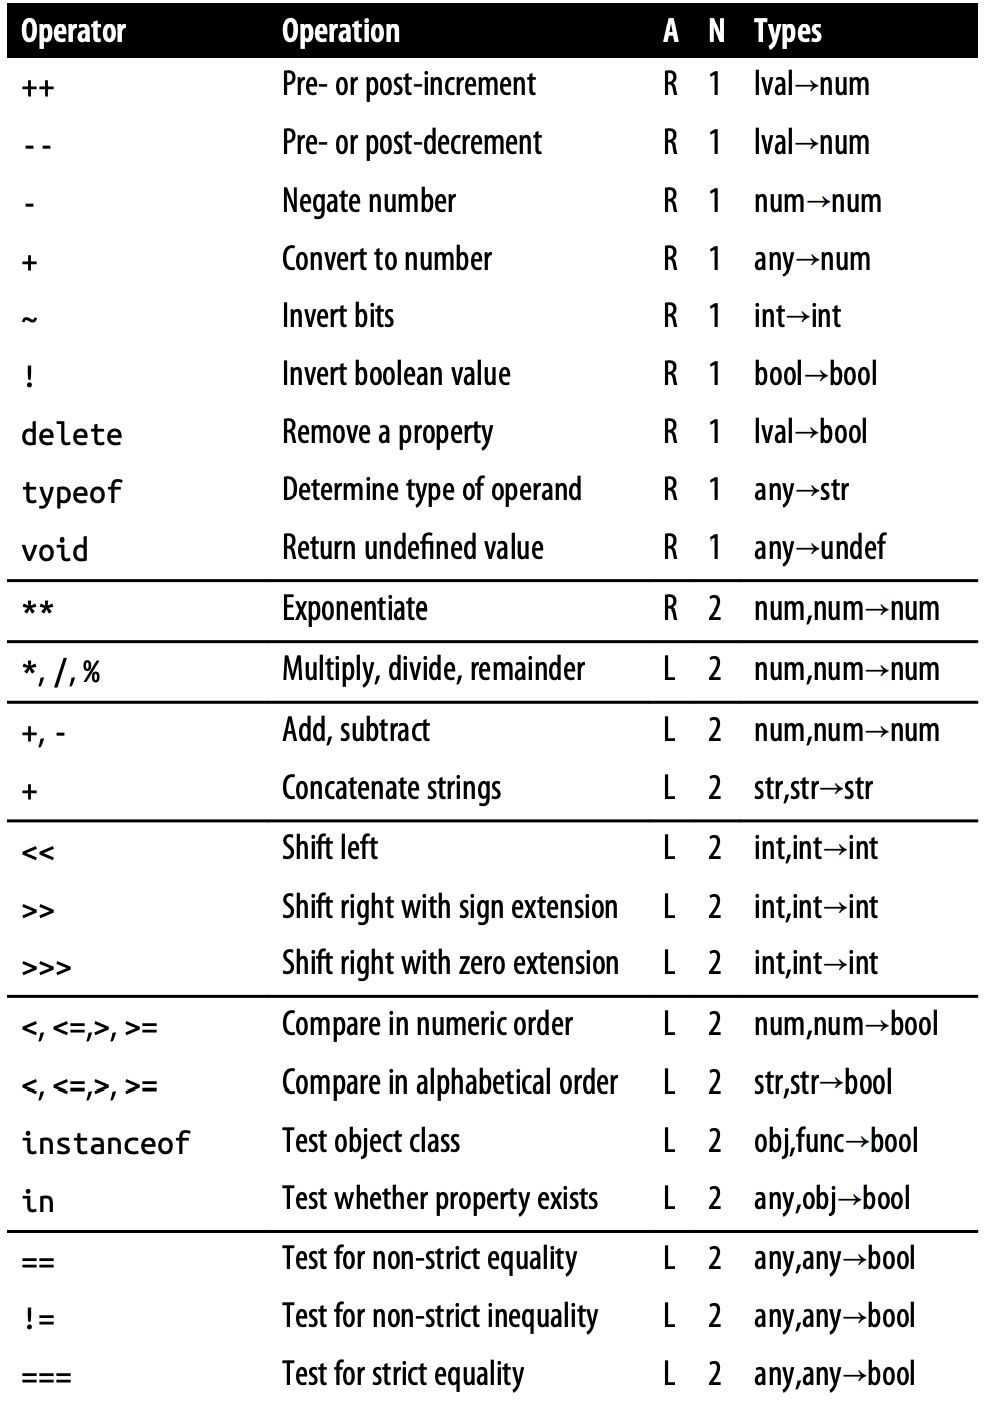
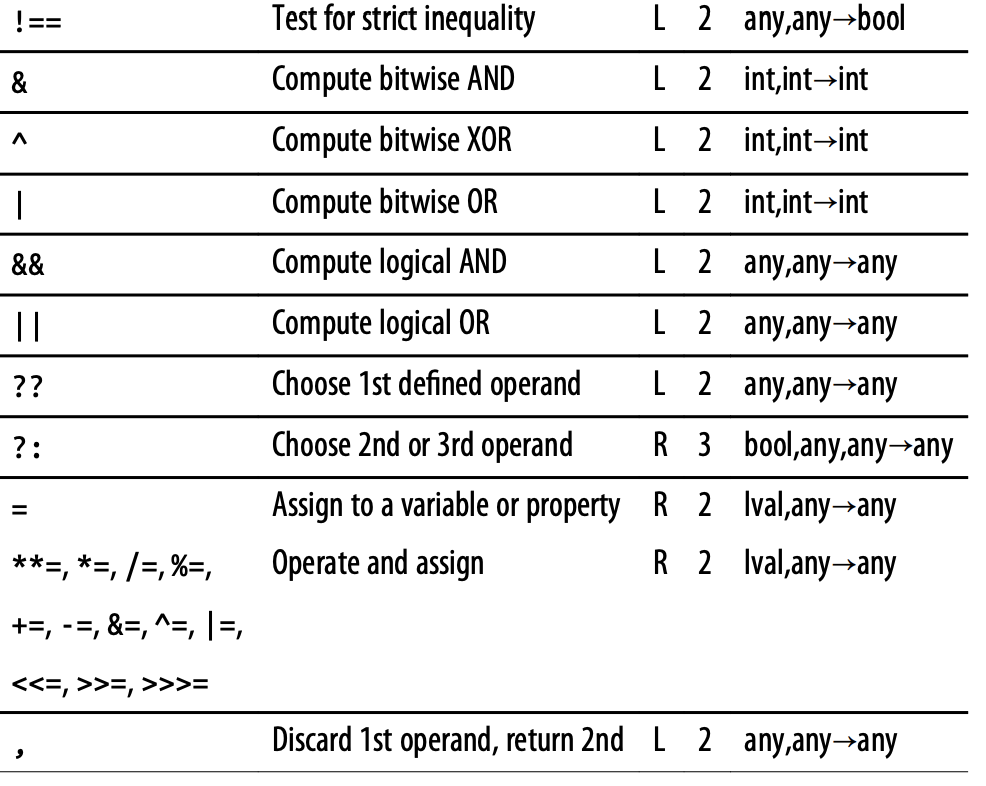

## 操作数

操作符可以简单的使用他们期望操作的操作数来分类。大部分 JavaScript 操作符，像 * ，是二元操作符，可以合并两个表达式为一个。JavaScript 也接受一元操作符，可以转换单个表达式为另外一个表达式，例如：- 操作符是一个一元操作符，可以讲操作数变为相反的符号。JavaScript 也支持三元条件操作符 `?:`

## 操作数和返回类型

有些操作符可以作用于所有类型，但是大部分期望指定的类型，具体可见前表。

JavaScript 操作符通常会按需转换操作数的类型，乘法操作符 * 期望数字类型的操作符，但是 "3" * "5" 也是合法的，因为 JavaScript 会转换操作数为 number ，这个表达式的值是 number 15 而不是 string "15" 。

需要注意的是，所有的 JavaScript 值都可以转换成真值或假值，因此接受 boolean 的操作符，其实可以接受任意类型。

有一些操作符的工作方式取决于他们操作对象的类型，典型的是 + ，如果操作对象是 number 则做加法，如果操作对象是 string 则做的拼接。

需要注意的是，复制操作符和一些其他的操作符，期望一个左值，左值是“一个可以合法出现在赋值表达式左边的表达式”，在 JavaScript 中，变量，对象属性，数组元素，都是合法的左值。

## 操作符副作用

计算一个像 2 * 3 这样简单的表达式不会有副作用，也就是任何后面的计算，都不会受这个表达式的影响。

++，-- 和 delete 操作符是存在副作用的，其他的操作符都没有副作用，但是需要注意，函数调用和对象创建表达式，如果函数体中，使用了存在副作用的操作符，则也会具有副作用。

## 操作符优先级

前表的操作符是按照优先级列表的，使用了风格线，同一组的具有相同的优先级，高优先级的操作符会优先低优先级的操作符计算。

赋值操作符的优先级最低，所以所有操作符计算完成之后，才会执行赋值操作。

操作符可以使用括号重新划定

属性访问和函数调用比操作符具有更高的优先级，会优先计算

?? 操作符在表中有比 || 或 && 的优先级更低，但是实际上，这些操作符的优先级关系并没有确定，ES2020 强制要求你使用括号指定优先级，在同时使用他们时。

## 操作符的结合性

前表 A 列，表示操作符的结合性，A 列的值时 L 表示从左往右计算，值时 R 表示从右往左计算。结合性表示相同优先级操作符的计算顺序。

## 执行顺序

操作符的优先级和结合性确定了复杂表达式中操作符的计算顺序。但是他们不会改变子表达式的计算顺序，JavaScript 始终按照左到右的顺序计算子表达式

例如表达式 `w = x + y * z` ，会先尝试计算 w 的值，计算需要先对 y 和 z 相乘，然后加上 x ，然后才会赋值给表达式 w。添加括号可以改变乘，加 和赋值的顺序，而不是从左向右的执行顺序。

## 算数表达式

这节我们倾向于讲解一些处理 number 的操作符，求幂，乘，除和减法操作符比较简单，会首先讲到。加法因为对 string 会做拼接，会有一个子节来介绍，一元操作符和按位操作符也有自己的子节来介绍

1. `**` 操作符
    - 有着比 * ,/,%更高的优先级。
    - 是从右向左的计算，2 ** 3 ** 4 实际上是 2 ** (3 ** 4)
    - 混合使用存在模糊，-3 ** 4 可能是 -（3 ** 4） 也可能是 （-3） ** 4 ，不同语言有不通的处理，JavaScript 中需要强制 括号 不然会抛出异常
    - ES2016 引入的新语法，作用和以前的 Math.pow() 一致

2. `/` 操作符
    - JavaScript 中所有的 number 都是浮点数，/ 法得到的结果都是浮点数结果
    - n/0 的结果是无穷大
    - 0/0 的结果是 nan

In [8]:
1/0

Infinity

In [9]:
0/0

NaN

3. `%` 操作符用于计算余数

In [10]:
5%2

1

In [11]:
-5%2

-1

注意，可以对小数计算余数

In [12]:
6.5 % 2.1

0.19999999999999973

### 加号操作符
处理 number 相加或者字符串拼接。当操作对象都是 string 或者 number 时，处理方式是显而易见的，当存在其他类型时，将会发生类型转换，+ 的会按一下方式进行

1. 如果任何一个操作符是 object，则使用之前描述的方法，转换成原始类型。Date 对象使用 toString() 方法转换，其他对象使用 valueOf ，如果 valudOf 没有返回一个 原始类型，则使用 toString 转换
2. 在 object-to-primitive 之后，如果任意一个操作对象是 string，则将另外一个转换成 string，然后做 string 的拼接
3. 反之，都转换成 number 然后进行相加

In [13]:
1+2

3

In [15]:
"1"+"2"

'12'

In [16]:
"1"+2

'12'

In [17]:
1+{}

'1[object Object]'

In [18]:
true+true

2

In [19]:
2 + null

2

In [20]:
2 + undefined

NaN

需要注意的是，当混合 string 和 number 时，可能是不具备混合性

In [22]:
1+2+" blind mice"

'3 blind mice'

In [23]:
1 + ( 2 + " blind mice")

'12 blind mice'

### 一元算数操作符

一元操作符修改操作对象，并产生一个新值。在 JavaScript 中 一元操作符有高优先级，并且全部都是右结合的。必要时，所有的算术一元操作符（+，-，++，--）都会将操作对象转换成 number。注意 + 和 - 同时用于一元和二元操作符。

一元算数操作符有：

    1. 一元加法操作符（+）: 一元加法操作符可以转换操作对象为 number，然后返回转换后的值，如果操作对象已经是一个 number，则不做任何操作。该操作符不能用于 BigInt 值，因为这种类型不能转换成常规的 number
    2. 一元减法操作符（-）：在必要时转换操作对象为 number，然后改变结果的符号
    3. ++：这个操作符必须要有一个左值，操作符转换操作对象为 number 然后加上 1 后赋值给左值。++操作符的返回值，取决于 ++ 的位置，在左侧，则返回加 1 之后的值，右侧返回加 1 前的值

In [2]:
(()=>{
    let i=1,j= ++i;
    console.log('++ at left',i,j);
    let n=1,m=n++;
    console.log('++ at right',n,m);
})()

++ at left 2 2
++ at right 2 1


    ++ 操作符常用于循环中

    4. --：与 ++ 相同，但是计算为减 1

## 关系表达式

关系表达式测试两个值的关系，然后返回 true 或 flase，关系表达式的结果总是一个 Boolean 值，这个值经常用于循环和控制语句中。

### 相等和不等操作符

== 和 === 都会检查两个值然后返回是否相等，都接受任意类型的操作对象，=== 是严格相等，必须是两个值 “相同”，== 是相等操作符，允许类型转换，判断的是两个值“平等”。

!= 和 !== 判断不相等，与上两个意义相同。

当 coding 时，应尽量使用严格相等和严格不相等。

1. === 严格相等的判断过程：
    - 两个值有不同类型，则不相等
    - 都是 null 或都是 undefined ，相等
    - 都是 ture 或者都是 false，相等
    - 都是 NaN ，不相等，因为 NaN 与所有值都不相等，包括他自己，因此能用 x !== x 或者全局方法 isNan() 判断值是否时 NaN
    - 都是 number 并且又相同的值，相等。-0和0 也相等。
    - 如果都是 string，并且在相同的位置，有着相同的 16-bit 值，则相等。如果 string 长度或内容不同，则不相等。可能有表现相同的字符串，但是由不同的 16-bit 值组成，JavaScript 不会做 Unicode 标准化，这样的两个 string 会被认为不相等。
    - 如果两个值指向相同的对象，则相等。如果指向不同对象，尽管属性相同对象也不被认为相等。
2. 允许类型转换的相等
    - 如果两个值类型相同，比较过程与严格相等一致。
    - 如果类型不相同，== 操作符会按一下规则做类型转换后再比较
        1. 如果一个值时 null 另一个时 undefined ，则相等。
        2. 如果一个是 number，另一个是 string，将 string 转换为 number 后，进行比较
        3. 如果有一个值是 true 则转换成 1 再比较，如果有一个是 false 则转换成 0 再比较。
        4. 如果一个值是 object，另一个是 string 或者 number，转换这个 object 为原始值，然后再比较。

In [4]:
"1" == true

true

### 比较操作符

`<,>,<=,>=` 操作符可以作用于任何类型，比较只能在 number 和 strings 上进行，因此对于非 string 和 number 的值，会发生类型转换

比较和转换规则如下：

    1. 如果比较的两边有一个是 object ，object 会被转换成原始类型，如果 object 的 valueOf 方法返回一个原始类型，则会用这个原始类型进行比较，否则会使用 toString
    2. 如果转换后，两边都能转换成 string，则进行 string 之间的比较，按照字母的顺序。
    3. 如果转换后，有一个不是 string，则两边都会转换成 number，然后进行 number 之间的比较。0和-0相等，Infinity 大于任何 number，-infinity 小于任何数字。如果任意一边存在 Nan，比较将直接返回 false。尽管算数操作符不允许但是比较操作符允许 BigInt 和 number 之间的比较。

In [6]:
Infinity>1000

true

In [7]:
Infinity>Infinity

false

In [8]:
100>NaN

false

In [12]:
BigInt(100)>Number(10)

true

需要记住的是，JavaScript 中的 string 是 16-bit 整数值的队列，而且 string 的比较实际上是这些值的 number 比较。这些 number 的编码顺序由 Unicode 决定，因此和本地语言字面意义的大小比较可能不一致。例如 ASCII 编码中，所有的大写字符编码都小于小写字符编码，因此 Zoo 实际上小于 aardvark

In [13]:
"Zoo"<"aardvark"

true

可以使用 String.localeCompare() 或 Intl.Collator 类，进行更有意义的比较。另外一种是将所有字符都转换成大写，或都转换成小写后再比较

`+` 在处理 number 和 string 时有不同的操作，且倾向于 string ，只有两边都是 number 时才做加法。而比较操作符更倾向于 number ，只有两边都是 string 时，才会进行 string 的比较。

In [14]:
1+2

3

In [15]:
"1"+"2"

'12'

In [16]:
"1"+2 // 2 convert to string 

'12'

In [17]:
11<3

false

In [18]:
"11"<"3" // string compare

true

In [19]:
"11"<3 // all convert to number

false

In [20]:
"one"<3 //can not convert to number,"one" contert to Nan

false

当操作对象出现 NaN 时，四个比较操作符都返回 false

### in操作符

in 操作符左边是一个 string，symbol 或可以转换成 string 的值，右侧是一个 object。如果这个 object 有与左侧同名的属性，则计算结果为 true，例如：

In [21]:
"x" in {x:1,y:1}

true

In [22]:
"z" in {x:1,y:1}

false

In [23]:
"toString" in {x:1,y:1}

true

In [24]:
"0" in [1,2,3]

true

In [25]:
1 in [1,2,3]

true

In [26]:
3 in [1,2,3]

false

### instanceof 操作符

instanceof 操作符，的左边是一个 object，右边是类的定义，如果左边的 object 是右边类的实例，则返回 true，否则返回 false。在 JavaScript 中对象的类是由初始化他们的构造函数标识的。因此 instanceof 的右侧应该是一个 function，例如：

In [40]:
(()=>{
    var d = new Date();
    return [
        d instanceof Date,
        d instanceof Object,
        d instanceof Number
    ]
})()

[ true, true, false ]

In [41]:
(()=>{
    var d = [1,2,3];
    return [
        d instanceof Array,
        d instanceof Object,
        d instanceof RegExp
    ]
})()

[ true, true, false ]

所有的对象都是 Object 的实例，instanceof 操作符会考虑父类。在判断 object 是否是指定类的实例时，如果左侧不是一个 object 则返回 false，如果右侧不是一个 类 则抛出类型错误。

为了了解 instanceof 的工作机制，需要知道 JavaScript 的继承机制原型链 。在计算 o instanceof f 表达式时，JavaScript 会计算 f.prototype 然后查找 o 的原型链是否有 f.prototype 相同的值，如果有则返回 true，否则返回 false。

## 逻辑表达式

逻辑表达式 &&,||和! ，常用于连接关系表达式，构成更复杂的表达式。

### 逻辑和(&&)

可以从三个层面理解

    1. 当作用对象都是 true 时，返回 true ，存在 false 时返回 false
    2. 不会做类型转换返回 boolean ，而时会返回操作对象本身。JavaScript 中的所有值都有 真 和 假，除了，null，undefined，0,-0,NaN,和 “” 之外，其他的值都是 true。
    3. 存在短路特性，如果中间存在 false ，则右侧不再计算，直接返回这个操作数。
    

In [42]:
(()=>{
    let o = {x:1};
    let p = null
    return [
        o && o.x,
        p && p.x
    ]
})()

[ 1, null ]

### 逻辑或（||）

当操作数存在一个为 true 时返回 真，当全部为 false 时返回假，和 && 一样，|| 也有更复杂的意义，会短路，并返回操作数本身，常用于选中第一个不是 falase 的值赋值

```
let max = maxWidth || preferences.maxWidth || 500
```

### 逻辑非 （！）

! 操作符是一个一元操作符，放在单一操作对象前，他会转换成 Boolean ，如果 x 是真值，则 !x 返回 boolean  true 如果 x 是假值，则返回 boolean false。也就是说，逻辑非会返回 boolean 类型的值。因此可以使用 !!x 将 x 转换成 Boolean 值。

作为一元操作符，! 有很高的优先级，因此如果你需要计算 p && q 的非，需要!(p && q)

## 赋值表达式

从右向左结合

In [46]:
(()=>{
    const t=((a=1)==0);
    const i=j=k=0;
    return [
        t,i,j,k
    ]
})()

[ false, 0, 0, 0 ]

## 执行表达式

像其他解释性语言一样，JavaScript 也有能力将字符串作为 JavaScript 源码执行，JavaScript 中使用全局函数 eval():

In [47]:
eval("3+2")

5

动态执行源码是语言的强大特性，但是实际上在实践中几乎不会用到，你需要小心的使用，以免造成安全问题，尤其不能将用户输入作为代码来执行。

> eval 是函数还是操作符？
    eval 是函数，但是在本章介绍，是因为他实际上应该被作为操作符对待，现代 JavaScript 解释器做了很多代码分析和优化的工作，如果一个函数调用了 eval ，那解释器将无法优化这个函数。将 eval 定义为函数可能带来的问题是，你可以给他一个别的名字
    let f =eval;
    let g =f;
    如果允许这样操作，那解释器无法知道那些函数有调用 eval，因此无法进行优化，为了解决这个问题呢，eval() 更应该被视为操作符和保留字，在后面关于严格模式中，会见 eval 作为更类似关键字的方式使用

In [5]:
(()=>{
    var test=eval;
    test("let a =1");
})()

### eval

eval 需要一个参数，如果你传递的参数不是一个 string，他简单的返回这个 value，如果传递的是一个 string，他会解析 string 为 JavaScript 代码，然后执行，并返回最有一行代码的值，如果最后一行代码没有值，则返回 undefined 。如果在代码执行过程中发生错误，则会抛出异常

In [6]:
eval(1)

1

In [7]:
eval("aa")

ReferenceError: aa is not defined

In [9]:
eval("const a=1;a")

1

eval 的关键之处在于，它与调用它的代码共享变量环境，也就是说，eval 里执行的代码，与在调用处直接执行这些代码是相同的，包括对变量的修改，取值和声明。

另外需要说明的是，传递给 eval 的参数，必须是完整的代码块，不能是 eval("return;") 这种部分代码，否则会报异常。

### 全局 eval

eval 有能力改变本地变量，对 JavaScript 的代码优化来说是一个很大的问题，因为 JavaScript 对调用 eval 的 function 会做很少的优化。可以考虑在全局，使用 const geval= eval ，在本地 function 中使用 geval ，因为这样的 eval 不会改变本地变量，指挥改变全局变量，以此不会印象 JavaScript 对 function 的优化。



In [1]:
    
    var x="global";
    var y="global";
    var geval=eval;
    
    function f(){
        let x="local";
        eval("x += 'changed';");
        return x;
    }
    
    function g(){
        let y="local";
        geval("y += 'changed';");
        return y;
    }
    
    console.log(f(),x);
    console.log(g(),y);
 

localchanged global
local globalchanged


注意，这种用法不仅可以提高 JavaScript 解释器的优化效率，也可以作为在顶层执行 JavaScript 代码的一种方式。

### 严格 eval

严格模式下，eval 服务声明本地变量，但是可以获取和修改本地变量。

严格模式使 eval 更像一个操作符，同时不允许你使用一个新的值重写 eval 方法。

## 其他操作符

JavaScript 支持其他操作符，以下介绍

### 条件操作符（?:）

### 首先定义(??)

首先定义操作符，用于计算第一个用定义的值，如果左边操作对象不是 null 且不是 undefined 则返回这个值，否则返回右边的值，与 && 和 || 类似，具备短路机制，当只有在左侧是 null 或者 undefined 是才计算右侧。表达式 a ?? b 等价于

```
( a !== null && a !== undefined) ? a : b
```

当你像选择有定义的值时，?? 比 || 更有用处，因为 || 会返回第一个 真值，而有些是假值，但是是有定义的，比如 number 0

ES2020 引入

### typeof 操作符

typeof 接受任意类型，返回一个 string

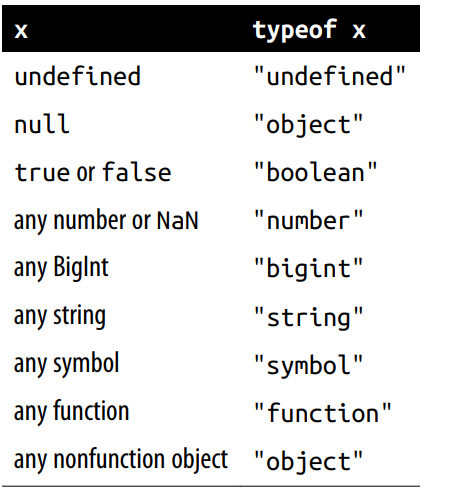

需要注意的是，typeof null 返回的是 object。

### delete 操作符

一元操作符，用于删除对象属性或者数组元素


In [4]:
(()=>{
    let o = {x:1,y:2};
    delete o.x;
    
    let a =[1,2,3];
    delete a[2];
    return [
        "x" in o,
        2 in a,
        a.length,
        a[2],
        a
    ]
})()

[ false, false, 3, undefined, [ 1, 2, <1 empty item> ] ]

注意，删除数组元素，不会改变数组长度，获取这个索引位置会返回 undefined （类似访问对象不存在的属性） 。删除数组元素，实际上构造了一个稀疏数组。

delete 的操作符期望一个左值，如果不是一个左值，操作符不会采取任何操作，直接返回 true。否则，delete 会尝试删除这个特殊的左值。不是所有的属性都可以被删除，non-configurable 属性无法被删除

在严格模式中，对 变量，函数等使用 delete 会抛出异常，因为他的操作对象必须是属性表达式。在删除 non-configurable 的属性时，也会抛出异常。但是在普通模式下，仅会返回 fasle 不会抛出异常。

### await 操作符

作用于一个 promise 对象，让异步调用像同步调用一样简单。仅在有 async 关键字的方法内使用。

### void 操作符

void 是一个一元操作符，他计算操作对象，然后放弃操作对象的值，返回 undefined。

### 逗号操作符

逗号操作符是一个二元操作符，他计算左边和右边的值，然后返回右边的值。

In [6]:
i=0,j=1,k=2

2

## 总结

1. 表达式时一段 JavaScript 程序
2. 任何表达式都能被计算，得到一个 JavaScript 值
3. 表达式可能会有副作用
4. 简单表达式，像字面量，变量引用，属性访问，可以组成产生更大的表达式
5. JavaScript 定义了操作符用于计算，组合，逻辑运算，赋值等。以及一些其他操作符，包括三元条件操作符
6. JavaScript + 同时可以用户 number 相加和 字符串 拼接
7. 逻辑操作符，&&,|| 有特殊的短路特性

# 语句

前章描述的表达式是 JavaScript 短语，而语句是 JavaScript 的句子或者命令。表达式时计算和产生值，而语句是被执行，来时一些事情发生。

其中一种“make something happen” 的方式时执行有副作用的表达式。例如赋值语句和函数调用语句。另一个类似的分类是定义新变量或者新函数的声明语句。

JavaScript 程序实际上就一系列被执行的语句。默认情况下，JavaScript 解释器是顺序的执行语句。另外一种“make something happen” 的方式是修改语句执行顺序。 JavaScript 有一些结构控制语句来做这些：
    
    - 条件：语句像 switch 和 if 可以控制解释器执行或者跳过一些语句，依赖某个表达式的值
    - 循环：语句像 while 和 for 可以重复的执行某些语句
    - 跳转：语句 break，return，throw 能够引起解释器跳转到程序的另外一部分
    


## 表达式语句

JavaScript 中最简单的语句是由副作用的表达式。赋值语句是主要的表达式语句，例如：
```javascript
greeting = "Hellow" + name;
i *= 3;
```

++ 和 -- 也有改变变量值的副作用，和赋值语句一样

```javascript
counter++
```

delete 操作符，也有修改 object 属性的副作用，通常用在语句中，而不是作为大表达式的一部分
```javascript
delete o.x;
```
函数调用语句也是主要的表达式语句之一，例如：
```javascript
console.log(debugMessage);
displaySpinner();
```
这些函数调用时表达式，他有影响宿主环境或程序状态的副作用，被作为语句使用。如果一个函数没有任何副作用，调用他也就没有意义，除非他是另外一个大表达式或者赋值表达式的一部分，例如，你不会仅做个计算，然后丢弃值：
```javascript
Math.cos(x);
```
但是你可能计算这个值，然后赋值给一个变量，以便未来使用
```javascript
cx = Math.cos(x)
```
注意，每行代码，都需要分号分隔。

## 复合和空语句

就和逗号操作符，将多个表达式组合成一个单一表达式一样，一个 `语句块` 组合多个语句为一个 `符合语句` ，一个语句块时一个简单的语句序列，使用花括号包裹。以下行，就像一个单一语句一样

```javascript
{
    x = Math.PI;
    cx = Math.cos(x);
    console.log("cos(n) = " + cx);
}
```
有几点需要注意的，1. 他不需要分号结尾，块内的语句仍然需要使用分号，但是块本身不需要。2.块内语句有缩减，这不是必选的，但是更方便理解和阅读。

空语句允许你在期望有语句的地方使用空语句，空语句看上去像是：
```javascript
;
```
JavaScript 解释器在执行空语句是，不会采取任何动作。空语句在创建 空循坏体的循环是有用，考虑以下循环
```javascript
for(let i = 0; i<a.length;a[i++]=0) ;
```
在这个循环中，所有的工作都已经在 a[i++]=0 中完成，因此循环体没有必要，可以采用空循环体。
如果你需要使用 空语句，一个好的代码习惯是使用注释表达编程意图
```javascript
for(let i=0;i<a.length;a[i++]=0) /* empty */;
```

## 条件

条件语句依赖一个表达式的值，决定跳过或执行语句。这些语句是代码的决策点。通常也可以称为 代码分支。

以下子杰，介绍了 JavaScript 的基本条件语句， if/else ，更复杂些的 switch 会在后面简介。

### if

if 语句是 JavaScript 做决策点的基本条件控制语句。
```
if (expression)
    statement
```
在这个形式下，表达式被计算，如果结果是 真值，语句会被执行，如果是假值，语句将不会被执行，例如
```javascript
if(username == null)
    username = "John Doe"
```
或者
```javascript
if(!username) username="John Doe"
```

JavaScript 语法在 if 关键词和表达式后需要一个单一的语句，但是你可以使用语句块来组合多个语句为一个，因此，if 语句可以这样使用

```javascript
if(!address){
    address = "";
    message = "please specify a mailing address.";
}
```

第二种 if 语句格式，是使用 else 语句，来在 表达式 是假值的时候使用，语法如下
```
if (expression)
    statement1
else
    statement2
```
这种格式在表达式为真时，执行表达式1，为假时执行表达式2



### else if
### switch
if 语句需要导致了程序执行的分支。如果有多个分支，可以使用 else if，但是如果多分分支的都依赖同一个表达式的值，那么没有必要每次都重写计算异步，这时可以使用 switch。switch 关键字可以如下使用：
```
switch(expression){
    statements
}
```
然而，完整的 switch 语法要更复杂一些。变量在代码块中被 case 标记。当 switch 执行时，它计算表达式的值，然后找到相同值的标记（使用 ===），如果找到，则执行这个标记处的代码，如果没有找到，则寻找 default 标记，执行 default 标记的代码，如果都没有则跳过整个 switch

```javascript
switch(n){
    case 1:
        // execute code
        break;
    case 2:
        // execute code
        break;
    case 3:
        // execute code
        break;
    case 4:
        // execute code
        break;
    default:
        break;
}
```
注意需要在代码中使用 break 关键字，这个关键字可以让解释器退出 switch ，继续执行后面的代码。switch 中的 case 条件仅仅时目标代码的开始点，而没有任何的结束点，如果没有 break，switch 执行 case 后面的代码，一直到代码块末尾。

case 后可以是一个表达式，switch 会顺序计算这个表达式，然后使用没有类型转换的 === 来和目标表达式值比较。

因为 case 后的表达式不一定被执行，因此最好只有没有副作用的表达式，以保持程序稳定

在之前的解释中，如果没有找到和目标值相同的 case 的value 则会执行 default ，这里的 default 是放在末尾的，但是实际上可以出现在任何地方。

## 循环

JavaScript 有五种循环语句，while,do/while,for,for/of(for/await)和for/in。循环的一个常用场景是迭代数组元素，会在后面讲到。

### while

语法：
```
while(expression)
    statement
```
解释器重复的执行 statement 当 expression 是真值时，你可以使用 while(true) 创建无线循环。

### do/while

do/while 和 while 类似，但是他可以保证循环体至少执行一次
```
do
    statement
while(expression);
```
### for

for 循环提供了更易用的循环结构。大部分循环有一个 counter 变量，这个变量在循环开始前初始化，在循环结束后改变，然后再次被测试。初始化，测试，改变，时循环变量主要的三个关键操作。for 循环的语法显示规范了这三个关键操作
```
for( initialize; test; increment)
    statement
```
等价的 while 循环是
```
initialize;
while(test){
    statement;
    increment;
}
```

可以组合多个初始换和变更操作，这是逗号操作符在JavaScript 最常见的应用
```javascript
let i,j,sum=0;
for(i=0,j=10;i<10;i++,j--){
    sum+=i*j
}
```

如果不需要初始换操作，也可以使用空表达式
```javascript
function tail(o){
    for(;,o.next;o=o.next) /* empyt */;
    return o;
}
```

也可以使用 for(;;)创建无限循环

### for/of

ES6 定义了一个新的循环语句：for/of ，这个新的循环语句与常规的 for 或者 for/in 循环不同。

for/of 循环工作于可迭代对象，后续会介绍可迭代对象。arrays，strings，sets，maps都是可迭代的，他们标识了一个元素的序列或者集合。

例如：


In [2]:
(()=>{
    let data=[1,2,3,4,5,6,7,8,9], sum=0;
    for(let element of data){
        sum += element;
        element++;
    }
    return [sum,data]
})()

[ 45, [
    1, 2, 3, 4, 5,
    6, 7, 8, 9
  ] ]

数组的迭代是实时的，迭代期间对数组的修改，会影响迭代的执行。如果我们在迭代内使用 data.push(sum) 则循环用于不会结束

#### for/of 循环作用于 object

对象默认不可以迭代，对普通 object 尝试使用 for/of 会抛出类型错误

In [3]:
(()=>{
    let o = {x:1,y:2,z:3};
    for(let element of o){
        
    }
})()

TypeError: o is not iterable

可以使用 Object.keys() 方法获取对象的 key 然后对 key 数组做 for/of 循环

In [4]:
(()=>{
    let o={x:1,y:2,z:3};
    let keys="";
    for(let k of Object.keys(o)){
        keys += k;
    }
    return keys
})()

'xyz'

也可以使用 Object.values 和 for/of 对对象的values 便利

In [5]:
(()=>{
    let o={x:1,y:2,z:3};
    let sum=0;
    for(let v of Object.values(o)){
        sum += v;
    }
    return sum;
})()

6

也可以使用 Object.entries() 同时遍历属性和值

In [8]:
(()=>{
    let pairs = "";
    let o={x:1,y:2,z:3};
    for (let [k,v] of Object.entries(o)){
        pairs += k+v;
    }
    return pairs;
})()

'x1y2z3'

#### for/of 用于 string

在 ES6 中 string 是可以迭代的


In [9]:
(()=>{
    let frequency={};
    for( let letter of "mississippi"){
        if(frequency[letter]){
            frequency[letter]++;
            continue;
        }
        frequency[letter]=1;
    }
    return frequency
})()

{ m: 1, i: 4, s: 4, p: 2 }

主要 string 的迭代是基于 unicode 编码点，而不是 UTF-16 字符。

#### for/of 用于 Map 和 Set

ES6 内置的 map 和 set 类也是可迭代的。可以使用 for/of 对 set 进行迭代

In [10]:
(()=>{
    let text="Na na na na na na na Batman!";
    let wordSet = new Set(text.split(" "));
    let unique = [];
    for(let word of wordSet){
        unique.push(word);
    }
    return unique;
})()

[ 'Na', 'na', 'Batman!' ]

对 map 的迭代

In [11]:
(()=>{
    let m = new Map([[1,"one"]]);
    for(let [key,value] of m){
        return [key,value]
    }
})()

[ 1, 'one' ]

#### 使用 for/await 异步迭代

ES2018 引入了一种新的迭代，异步迭代器。

```javascript
async function printStream(stream){
    for await(let chunk of stream){
        console.log(chunk);
    }
}
```

### for/in

for/in 看上去与 for/of 类似，for/of 期望一个可迭代对象，而for/in右侧期望一个 object。for/of 时 ES6 引入的，但是 for/in 很早前就是 JavaScript 语法的一部分

for/in 条件语句遍历对象的属性名，语法如下
```
for(variable in object)
    statement
```
示例：
```javascript
for( let p in o){
    console.log(o[p]);
}
```
JavaScript 解释器首先计算 对象表达式，如果结算结果是 null 或者 undefined，解释器回跳过循环，执行后面的语句。每个 object 的可枚举属性都会在循环体中执行。在执行迭代之前，解释器计算变量表达式，然后间属性名复制给它。




In [12]:
// 无异常
for (let p in null){
    p
}

注意 for/in 循环的变量可以是任意的表达式，只要计算之后合适作为赋值表达式的左值杰克。这个表达式会在每次循环时计算。

In [13]:
(()=>{
    let o ={x:1,y:2,z:3};
    let a=[],i=0;
    for(a[i++] in o) /*empty*/;
    return a;
})()

[ 'x', 'y', 'z' ]

JavaScript 数组也是特殊类型的 object ，数组可以用于 for/in 循环，循环属性即是数组索引。但是 for in 作用于数组可能会有奇怪的 bug 因为 for/in 可以遍历所有可枚举属性，而不一定是数组的索引，因此对于 array ，使用 for/of 是更正确的选择。

for/in 循环不会枚举 object 所有的属性，他不会枚举 name 是 symbols 的值，也不会枚举非可枚举类型的属性。对象大部分的内置属性都是不可枚举的。所有我们代码中定义的属性和方法都是可枚举的（除非设置为不可枚举）

原型链上的可枚举属性也会被枚举到，导致你的循环可能不像你预期的那样执行，处于这个原因，我们倾向于使用 for/of 循环作用域 Objec.keys 而不是 for/in 循环。

如果 for/in 循环体中给对象删除活新增了属性，那可能会影响后面循环体的执行。



## 跳转

另外一种语句类型是 跳转语句，他们可以让 JavaScript 解释器跳转到源代码的一个新的位置。break 语句让解释器跳转到循环末尾或者其他语句。continue 是解释器跳过循环体后面的代码，跳转到循环开始的位置。JavaScript 允许语句被标记，而 break 和 cntinue 都可以指定目标循环或者其他语句标签。

return 语句让解释器从函数调用语句跳转回调用函数的地方。throw 语句也是从调用中推出的常规方法。throw 语句，是一个已成，用于配合 try/catch/finally 语句。

### 标记语句
所有的语句都可以被标记：
```
identifier: statement
```
通过标记一个语句，你可以在后面任意地方使用，通过 break 或者 continue 语法直接跳转到定成的循环。break 和 continue 是位于可以用到 标记的JavaScript语句。

```javascript
mainloop: while(token !== null){
    continue mainloop;
}
```
标记的名称可以是任何合法的 JavaScript 标识符，而且不能是保留字。

### break

提前退出循环或者 switch，因此 break 只能出现在循环或者switch 语句中才是合法的。

JavaScript 允许 break 指定循环
```
break labelname
```
当 break 指定标签时，JavaScript 会跳转到被 标记的语句，如果没有找到该标记，会抛出异常，被标记的语句可以时任意语句，而不一定时循环。

你会使用 break label ，当你想 break 的不是最近的循环体时，例如：


```javascript
     let matrix = getData(); // Get a 2D array of numbers from somewhere
    // Now sum all the numbers in the matrix.
    let sum = 0, success = false;
    // Start with a labeled statement that we can break out of if errors occur
    computeSum: if (matrix) {
     for(let x = 0; x < matrix.length; x++) {
         let row = matrix[x];
         if (!row) break computeSum;
         for(let y = 0; y < row.length; y++) {
             let cell = row[y];
             if (isNaN(cell)) break computeSum;
             sum += cell;
         }
     }
     success = true;
    }
    // The break statements jump here. If we arrive here with success == false
    // then there was something wrong with the matrix we were given.
    // Otherwise, sum contains the sum of all cells of the matrix.


```

### continue

continue 语句与 break 语句用法类似，也可以指定 continue lable，但是 continue 并不是退出循环，而是在开始下一轮迭代。

continue 只能用在循环体中，否则会抛出类型错误。

当 continue 执行时，当前迭代会被种植，下一轮开始，不同类型的迭代，可能有不同的影响。

1. 在 while 循环中，循环开始的表达式会被再次 test,如果时 true ，循环体从头开始执行
2. 在 do/while 循环中，执行跳转到循环体最后，重新执行 test ，然后重新开始循环
3. 在for 循环中，increment 表达式会i选，然后 test 表达式会再次 test 
4. 在 for/of 或者 for/in 循环中，循环使用下一个迭代值或属性名开始。

### return

函数调用是一个表达式，而所有的表达式都有值。函数内的 return 指定了函数表达式的值。

return 仅能用于函数体中，在其他地方使用会抛出类型错误。

没有 return 时，函数执行所有函数体语句然后返回到调用方，这种情况下，函数表达式的值会是 undefined。

### yield

yield 语句和return 一样，但是仅能用于 ES6 生成器函数，来产生一个新的值，而不需要实际的返回


In [14]:
function* range(from ,to){
    for(let i=from;i<to;i++){
        yield i;
    }
}

### throw

异常表示发生了未预料的情况，或者错误。抛出异常时发送了错误的信号，而捕捉异常时尝试处理这个错误并从异常中恢复。在 JavaScript 中，异常时使用 throw 抛出异常，而是用 try/catch/finally 捕捉异常。

```
throw expression;
```

expression 可以时任何类型的值，可以是自定义的错误码，或者具备可读性的 string。Error 类是 JavaScript 解释器用于处理异常的类，你也可以使用这个类。

异常发生后，JavaScript 解释器会立即停止程序执行，并跳转到最近的异常处理中。异常处理使用 try/catch/finally 语句。如果发生异常的代码块没有这些语句，解释器会检查更高层次的代码块，直到找到，如果函数没有 try/catch/finally 来处理异常，则异常会冒泡到调用函数的代码中。

### try/catch/finally

## 其他
其他的语句，像 with,debugger,和 "use strict"

### with
with 语法可以是对象的属性，在代码块中，作为已声明的变量使用。
```
with (object)
    statement
```

这个语句创建一个临时的作用域，使 object 的属性作为变量，然后在这个作用域中执行语句

with 在严格模式中时禁用的，而且在非严格模式中也尽量不要使用。有 with 的JavaScript 代码，会非常难以优化，比没有 with 的相同代码要慢的多。

### debugger
debugger 语句通常不会做任何事，但是如果你有打开 debug 程序，这个语句会触发一个断点，让你可以检查程序。

In [2]:
function f(o) {
 if (o === undefined) debugger; // Temporary line for debugging purposes
 // The rest of the function goes here.
}


### 严格模式
"use strict" 时 ES5 引入的命令，命令不是语句，有两个重要的区别，在 "use strict" 和普通语句之间：
1. 不包含任何语言关键字：这个命令时一个表达式语句，时特殊字符串字面量的常量。
2. 只能在脚本的开始，或者 function 体的开始使用。

使用严格模式的目的是，表示命令之下的代码都是严格代码。如果在严格代码中调用 eval 传递给 eval 的的 string 在执行时，也会是严格模式下的。

除了显示声明严格模式外，class 体和 ES6 模块，会自动运行在严格模式下。也就是说，如果你的 JavaScript 代码写成了一个模块，会自动使用严格模式，而不用显示声明

严格模式和非严格模式的区别：
1. 严格模式下 with 不可用。
2. 严格模式下，所有的变量都需要声明。
3. 严格模式下，函数调用（非方法调用）的 this 是 undefined，非严格模式下是 golbal。严格模式下，当一个函数使用 call 或者 apply 调用，这个 this 的值是传递给 call/apply 的值。（非严格模式下，null 和 undefined 会被替换成 global object）.
4. 严格模式下，赋值给不可写属性，或者创建一个新的属性在不可扩展对象上，会抛出类型异常（非严格模式下，静默失败）
5. 严格模式下，传递给 eval 的代码，不能声明变量或则定义函数。
6. 严格模式下，函数的 Arguments 对象有传递给function 的值的静态复制。
7. 严格模式下，试图删除不可配置的属性，会抛出类型异常
8. 严格模式下，对象字面量，有两个或多个同名属性，会抛出异常。
9. 严格模式下，函数声明有两个或多个同名参数会抛出异常。
10. 严格模式下，八进制整形字面量（0开始没有 x 结尾）是不允许的。
11. 严格模式下，eval 和 arguments 被作为关键词对待，不允许改变他们的值，不可以赋值给他们，声明他们为变量，使用他们做函数名，使用他们做参数名。
12. 严格模式下，测试调用栈的能力会被限制。arguments.caller 和 arguments.callee 都会抛出类型错误。

## 声明语句

关键词 const, let, var, function, class, import 和 export 技术上都不是语句，但是他们看上去太像语句了。

这些关键词，更准确的称谓是“声明”而不是语句，本章语句的定义是 “make someting happen" 声明服务于定义新的变量，以及提供一个 name 指向这个变量，他们本身并做不了什么，但是他们定义了你的程序中其他语句的含义。

### const,let,var

在 ES6 之后，const 定义常量，而 let 定义变量。在 ES6 之前，var 关键词是唯一声明变量的方式，而且没有声明常量的途径。变量使用 var 声明的，作用域会是整个函数，而不是语句块。这可能会导致一些 bug ，在现代的 JavaScript 中，没有理由使用 var 代替 let。

### function

function 用于定义函数，一个函数声明：
```javascript
function area(radius) {
 return Math.PI * radius * radius;
}
```
函数声明会创建一个函数对象，然后复制给指定的名字。程序的任何地方，我们都可以使用则个名字来执行函数的代码。

函数定义会被举升

### class 
在 ES6 之后，class 关键字用于创建一个新类，和 function 不同的是，class 声明不会被举升，你不能在类代码声明之前的地方使用这个类

### import and export

import 和 export 一起使用，可以让在一个模块中定义的值，在另一个模块可用。一个模块是一个 JavaScript 文件，有自己的全局 namespace 和其他模块完全独立。唯一可以让一个 模块的值被另一个模块使用的方式是，在这个模块导出，另外一个模块导入。



## 总结

本节介绍了 JavaScript 语言的语句

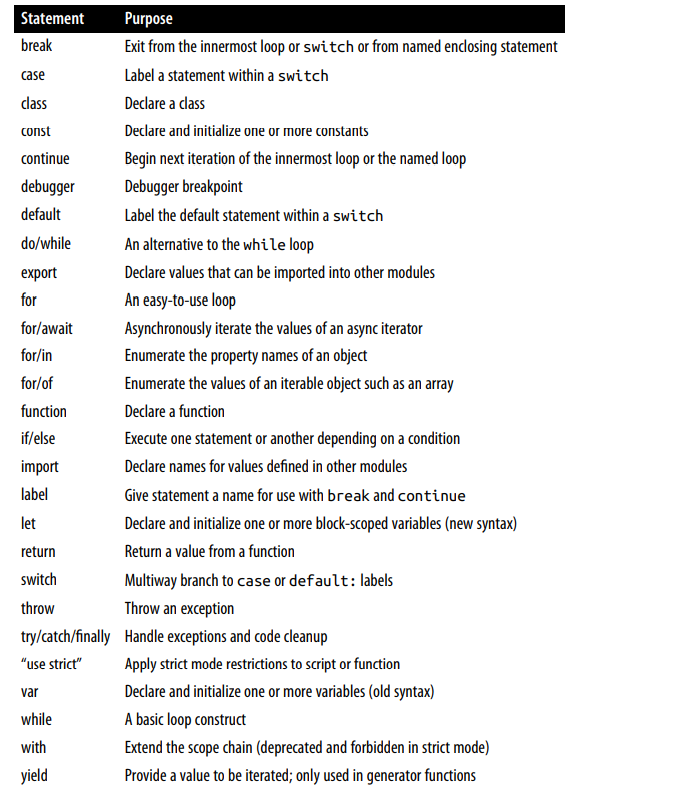


# 对象

Object 事JavaScript中最广泛基础的数据类型，因为对象如此重要，因此理解它的工作细节是重要的。本章如下介绍了 object 。
1. 对象概览
2. 创建对象，查询，设置，删除，测试和枚举对象属性
3. 扩展，序列化，定义对象的重要方法。
4. ES6 引进的新的对象字面量语法。

## 对象介绍
对象是属性的无序集合，每个属性都有 name 和 value，属性名通常是数组（也可以是 symbols）,可以任务对象 map strings to values 但是对象不是简单的 strong-to-value map，JavaScript 对象可以继承其他对象，通过原型的方式。原型继承是 JavaScript 的关键特性。

JavaScript 对象是动态的，属性可以被 add 和 deleted ，但是也可以用于模拟静态类型语言的静态对象和结构。

对象是可修改的，而且是通过应用而不是值来维护，let y=x 实际上是将 x 的引用赋值给 y，而不是值，因此对 y 的修改，同时会引起 x 的变化。

属性包括 name 和 value ，name 一般是字符串甚至是空字符串，对象 name  不能重复，value 可以是任意 JavaScript 值，也可以是 getter 或者 setter 的函数。

某些情况下，需要区分对象自身的属性和继承的属性。

另外，对象这些 name 和 value ，每个属性有三个属性
    1. `writable` 属性，指定属性的这个值是否可以被设置
    2. `enumerable` 属性，指定是否可枚举
    3. `configurable` 属性，指定属性是否可以被删除，以及属性配置是否可以修改。
    
很多 JavaScript 内置对象的属性是 只读，不可枚举，不可配置的。默认情况下，所有你创建的对象，都是可写，可枚举，可配置的，后面会介绍控制默认行为的方法。

## 创建对象
可以通过三种方式创建对象，1. 字面量，2. new 关键词，3. Object.create 方法


### 字面量
创建对象最简单的方式是使用对象字面量。这是一个简单的格式，对象字面量是逗号分隔的 name-value 列表，使用 {} 包裹。属性名是一个 JavaScript 标识符，或者字符串字面量，属性值是一个 JavaScript 表达式，表达式的值会成为这个属性的值。

In [4]:
(()=>{
    let empty = {}; // An object with no properties
    let point = { x: 0, y: 0 }; // Two numeric properties
    let p2 = { x: point.x, y: point.y+1 }; // More complex values
    let book = {
         "main title": "JavaScript", // These property names include spaces,
         "sub-title": "The Definitive Guide", // and hyphens, so use string literals.
         for: "all audiences", // for is reserved, but no quotes.
         author: { // The value of this property is
         firstname: "David", // itself an object.
         surname: "Flanagan"
         }
    };
    return book;
})()

{
  'main title': 'JavaScript',
  'sub-title': 'The Definitive Guide',
  for: 'all audiences',
  author: { firstname: 'David', surname: 'Flanagan' }
}

最后一个属性也包含逗号是合法的，有些编程风格鼓励这样做，可以减少语法错误。

对象字面量是一个表达式，每次执行都会创建一个新的对象。每次创建时，对象属性的值也会重新计算。

### 使用 new 创建对象
new 操作符可以创建和初始化一个新对象，new 关键字后必须跟随函数调用。通过这种按方式使用的函数，称之为构造函数，服务于初始化一个新对象。

In [5]:
(()=>{
    let o = new Object();
    let a = new Array();
    let d = new Date();
    let r = new Map();
    return [o,a,d,r]
})()

[ {}, [], 2022-02-17T02:14:55.946Z, Map(0) {} ]

### Prototypes
> 没有 prototype 表示对象没有原型，没有 prototype 属性，表示 test.prototype 不存在

几乎每个 JavaScript 对象都有一个与他相关的对象，对象从这个关联对象继承属性，这个关联对象即是 prototype。

所有使用对象字面量创建的对象，都有同一个 prototype 对象，这个对象指向 Object.prototype 。使用 new 关键词创建的对象，构造函数的 prototype 属性，会成为新对象的 prototype。因此 对象使用 new Object() 创建的对象，继承了 Object.prototype ，和对象字面量创建的对象一致。

同样的，使用 new Array() 创建的对象，使用 Array.prototype 作为他的 prototype，使用 new Date() 创建的对象，使用 Date.prototype 作为 prototype。

几乎所有 object 都有 prototype ，但是只有少数 object 有 prototype 属性（函数），正是这些有 prototype 属性的对象，定义了其他对象的 prototype。

Object.prototype 是少数没有 prototype 的对象：他不继承任何属性。其他的 prototype 对象是普通的 object 而且有 prototype。大部分内置和大部分用户定义的构造函数，都有 prototype 继承自 Object.prototype。例如，Date 对象使用 new Date() 创建，继承 Date.prototype 同时继承 Object.prototype。这种一系列的 prototype 对象关联，被称之未原型链。

### Object.create()
Object.create() 创建一个新的对象，使用第一个参数作为对象的 prototype。

In [6]:
(()=>{
    let o1 = Object.create({x:1,y:2});
    return o1.x+o1.y
})()

3

你可以传 null 创建一个对象，不继承任何属性，包括基本的方法，像 toString。

In [9]:
(()=>{
    let o2 = Object.create(null);
    return [o2,o2.toString]
})()

[ [Object: null prototype] {}, undefined ]

如果想创建一个空对象，类似于 {} 或 new Object() 做的那样。可以传递 Object.prototype 

In [10]:
(()=>{
    let o2 = Object.create(Object.prototype);
    return [o2,o2.toString]
})()

[ {}, [Function: toString] ]

Object.create() 很强大，后面很多地方都会出现，第二个参数可以描述属性。

另外一个 Object.create 的用法是，当你不想对象被第三方方法修改时，比起直接传递 object 给函数，你可以传递一个继承自这个 object 的对象，这样如果函数修改或者设置属性，原始的对象不会被影响

In [16]:
(()=>{
    let o ={x:'dot change this val',y:{a:1,b:2}};
    let func=(obj)=>{
        obj.y=1;
        obj.x=2;
        return obj;
    }
    let newO = func(Object.create(o))
    return [o,newO]
})()

[ { x: 'dot change this val', y: { a: 1, b: 2 } }, { y: 1, x: 2 } ]

## 查询和设置属性
访问对象属性通过 . 或者 [] 来操作。左侧需要一个可以计算为 object 的表达式，右侧需要时一个属性名称的标识符。如果使用 [] 括号内需要是一个计算为 string 的表达式。

创建属性，通过 . 或者 [] ，并放置于 = 号的左侧。[] 内的表达式要能计算为一个 string 或者能转换为 string 或 Symbol。

### 对象为关联数组
当使用 [] 访问数组属性时，这种语法，更像时数组访问，而数组的 index 不是 number 而是 string。这种类型的数组称为 关联数组（hash,map dictionary），JavaScript 的对象是关联数组。本节介绍为什么这很重要。

在强类型语言中，对象的属性是预先定义好的，在运行时无法新增或修改，但是 JavaScript 是弱类型语言，因此可以动态创建属性。当时用 . 操作符时，你需要一个标识符作为要访问的属性名称，而标识符不是 JavaScript 的数据类型，因此无法被程序动态维护。

当使用 [] 时，因 [] 期望一个 string ，因此可以用于动态新增或访问属性。

### 继承

JavaScript对象有一个自己的属性集台，同时他也从他的原型对象继承一些属性。

当你在对象O中查询属性Ⅹ时如果O没有这个属性，他会继续从O的原型对象中查问这个属性。如果O的原型对象也没有这个属性，则会在原型对象的原型中查找，直到找到这个属性，或者找到的原型为null。

如果你复制一个属性 x 对对象 o，如果 o 有这个属性，则会修改这个属性的值，如果 o 没有这个属性，则会在 o 上创建一个属性 x，如果 o 本身没有这个属性，但是从原型上继承了这个属性，也会在 o 上创建一个新的属性 x 。

属性继承会测试原型链，仅仅用于测试属性赋值是否允许，如果 o 继承了一个只读属性 x ，对 x 的赋值将不被与允许。然而，他只会在对象上创建或修改属性，绝对不修改对象原型的属性。事实上，继承只发生在属性查询时，而不会发生在设置时，这是 JavaScript 的一个关键特性。

In [17]:
(()=>{
    let unitcircle = {r:1};
    let c = Object.create(unitcircle);
    c.x =1 ;
    c.y = 1;
    c.r = 2;
    return unitcircle.r
})()

1

如果 o 继承了属性 x ，而 x 是一个访问器属性，有一个 set 方法，这是 set 方法会被执行，而不是在 o 上再创建一个 x ，但是，这个 set 方法被调用在对象 o 上，而不是 o 的原型上，因此这个方法定义的任何属性，都在 o 上，原型对象依然不会被修改。

### 属性访问错误

属性访问表达式并不是总能返回一个值，本节解释在查询或设置属性中可能会遇到的问题。

查询对象一个不存在属性时不会报错，会返回一个 undefined。





```javasctipt
book.subtitle
```
但是当尝试访问一个值为 null 或者 undefined 的属性时，会报错。
```javascript
let leng=bool.subtitle.lenght
```

因此当作链式访问时，需要注意被访问对象是否是 null 或者 undefined。有两种方式来防止异常发生
```javascript
let surnam = undefined;
if(book){
    if(book.author){
        surname = book.author.surname
    }
}
```
或者
```javascript
surname = book && book.author && book.author.surname;
```

ES2020支持条件访问，因此可以这样
```javascript
let surname = book?.author?.surname
```

试图在 null 或者 undefined 值上设置属性，同样会有类型错误。当属性时制度时，或者对象不允许新属性时，在严格模式下，属性赋值会报错。属性设置规则如下：
1. o 有一个自己的属性 p 而且是只读的。
2. o 有一个继承的属性 p 而且是只读的。
3. o 没有属性 p 而且 o 也没有继承属性 p，而且o 的 extendsible 属性是 false。

## 删除属性
`delete` 操作符可以从对象中移除一个属性，操作对象需要是一个属性访问表达式，

```javascript
delete bool.author;
```
delete 操作符仅删除自己的属性，而不是继承的属性，删除继承的属性，必须直接从原型对象删除，这会影响所有继承这个对象的对象。

在删除成功，或删除不存在的属性，或用于的值不是属性表达式时，delete 都会返回 true

delete 不会移除 configurable 属性为 falase 的属性。内置对象，作为 global 对象的属性，是不可配置的，包括函数声明和对象声明，严格模式下，删除 non-configurable 的属性会抛出类型错误。

```javascript
// In strict mode, all these deletions throw TypeError instead of returning false
delete Object.prototype // => false: property is non-configurable
var x = 1; // Declare a global variable
delete globalThis.x // => false: can't delete this property
function f() {} // Declare a global function
delete globalThis.f // => false: can't delete this property either

```
当在非严格模式下，删除 global 对象的可配置属性时，你可以直接删除变量
```javascript
globalThis.x = 1; // Create a configurable global property (no let or var)
delete x // => true: this property can be deleted
```
在严格模式下，delete 会报错，严格模式下的 delete 不能作用于标识符，必须作用于属性表达式
```javascript
delete x;
delete globalThis.x;
```



## 测试属性

javascript 对象可以被认为时属性的集合，测试对象是否有某属性通常很有用，你可以使用，in 操作符，hasownproperty() 和 propertyIsEnumerable 方法，或者简单的查询这个属性。

in 操作符期望一个属性 name 在左侧，一个 object 在右侧，返回 true ，如果对象有这个属性，或者继承了一个这样的属性

In [1]:
(()=>{
    let o = {x:1};
    return [
        "x" in o,
        "y" in o,
        "toString" in o
    ]
})()

[ true, false, true ]

hasOwnProperty 方法可以测试对象是否独有这个属性，而不是继承这个属性，如果是继承的属性，会返回 false

In [3]:
(()=>{
    let o ={x:1};
    return [
        o.hasOwnProperty("x"),
        o.hasOwnProperty("y"),
        o.hasOwnProperty("toString")
    ]
})()

[ true, false, false ]

propertyIsEnumerable 只有当属性是对象独有的属性，而且是可枚举的时，才会返回 true。而内置的属性都是不可枚举的，使用 JavaScript 不做特殊配置创建的属性都是可枚举的。

In [5]:
(()=>{
    let o = {x:1};
    return [
        o.propertyIsEnumerable("x"),
        o.propertyIsEnumerable("toString"),
        Object.prototype.propertyIsEnumerable("toString"),
    ]
})()

[ true, false, false ]

还可以使用属性访问，然后使用 !== 判断是否时 undefined

In [8]:
(()=>{
    let o ={x:1};
    return [
        o.x !== undefined,
        o.y !== undefined,
        o.toString !== undefined,
    ]
})()

[ true, false, true ]

但是这不能区分是属性不存在，还是属性存在但是等于 undefined 。in 可以区分。

## 可枚举属性

除了测试存在的属性，我们有时也需要枚举出对象所有的属性，这里有几种不同的方式实现。

for/in 循环。会遍历出所有的属性，包括对象自身的和继承过来的。如果不想枚举出继承的属性，可以在循环体中使用 !o.hasOwnProperty 排除。

除了使用 for/in，常用的方式还有获得一个属性名组成的数组，然后使用 for/of 循环遍历数组。有四中方法你可以得到对象的属性数组。
1. Object.keys() 获取对象自身的可枚举属性，这不包括不可枚举，或继承的或 symbol 作为属性名的属性。
2. object.getOwnPropertyNames 获取所有属性包括被设置为不可枚举的属性。
3. object.getOwnPropertySymbols 返回 name 是 symbols 的自有属性，无论他们是否可以枚举
4. Reflect.ownkeys 返回所有的自由属性名，包括可枚举不可枚举，string 或者 symbol

### 属性枚举顺序

ES6 正式定义了自有属性的枚举顺序。Object.keys ,Object.getOwnpropertyNames, Object.getOwnPropertySymbols , Reflect.ownKeys, 以及相关的方法如 JSON.stringify 都会安装这个顺序罗列属性。
1. 非负整数的属性安装数值顺序首先列出。这个规则让 array 或者 array-like object 有正确的属性枚举顺序
2. 剩下的 string 类型的属性，按照添加顺序罗列。使用对象字面量定义的，按照对象字面量里的顺序罗列。
3. 最后，所有的 symbol 属性，按照添加顺序罗列。

for/in 和上述枚举函数的顺序有些差异，for/in 先按照上面描述的顺序，罗列自身的属性，然后对原型对象按照上述规则继续罗列。


## 扩展对象

JavaScript 编程中的常见操作时复制一个对象的属性到另一个对象，很多三方库函数实现了这种复制，最后 ES6 定义了 Object.assign 方法来支持。

Object.assign 接受两个或多个 object 作为他的参数，他修改第一个 object 的属性（target），但是不会修改第二个之后的 object 属性（source）。Object.assign 复制 source 对象的自由可枚举属性到 target 对象，按照参数列表的顺序处理 source 对象，排在后面的 sorce 对象的属性会覆盖排在前面的 source。

Object.assign 复制有 get/set 的属性时，会执行 source 的 get 和 target 的 set ，而不会复制 get/set 本身。

一种常见的需要复制对象的场景时，你定义了一个 default 对象，包含很多属性的默认值，你希望赋值到新对象中，补充新对象不存在的属性。直接使用 Object.assign 并不能达到这种目标，因为这会覆盖所有的属性。
```javascript
Object.assign(o,defaults)
```
你需要这样
```javascript
o=Object.assign({}, defaults,o)
```
或者可以用展开操作符
```javascript
o={...defaults,...o}
```
Object.assign 修改第一个对象，而展开操作符生成一个新对象

除此，还有 restrict() 可以删除对象属性，如果这些属性没有出现在别的对象中。subtract() 可以移除对象出现在另外一个对象中的全部属性。

## 序列化对象

对象序列化是转换一个 object 为 string 的过程，这个 string 后续也可以还原成 object。JSON.stringify() 和 JSON.parse() 是序列化和还原的两种方法，这两种方法使用 json 格式，看上去于对象字面量接近。

json 并不能表现所有的 JavaScript 值。
1. 对象，数组，字符串，数值，true，false 和 null 可以支持序列化和还原。
2. Nan,Infinity ,-Infinity 序列化成 null
3. Date 对象序列化成字符串（ISO 格式），详见 Date.toJSON ，但是不能被还原成原始的 Date 对象。
4. Function，RegExp 和 Error 对象以及  undefined 不能被序列化或还原。
5. JSON.stringify 只会序列与对象的自身可枚举属性，如果属性值不能别序列化，这个属性会被跳过


## 对象方法

在早期讨论过，所有的 JavaScript 对象都从 Object.prototype 继承属性。这些继承属性主要是方法。因为他们是全局可用，因此被很多 JavaScript 程序员关注。

### toString 方法
toString 方法没有参数，返回一个 string 表现这个对象的值。这个方法会在需要把对象转换成 string 时调用，例如 + 一个 object 或者 传递 object 给一个期望 string 参数的方法。

默认的 toString 方法不是很有用，（除了在区分对象的类时）

In [2]:
({x: 1,y: 1}).toString()

'[object Object]'

因为默认的 toString 不是很有用，因此许多类定义了自己版本的 toString ，例如数组转换成 string 时。你也可以这样定义自己的 toString

In [3]:
(()=>{
    let point={
        x:1,y:2,
        toString:function(){ return `(${this.x}, ${this.y})`}
    }
    return String(point)
})()

'(1, 2)'

### toLocaleString 方法

除了 toString 方法，对象都有一个 toLocaleString 方法，这个方法的目的是返回本地化的 string ，默认的 toLocalString 方法只是简单的调用了 toString 然后返回这个 string。

Date 和 Number 类定义了自定义的版本来展示  number ，dates 和 times。
数组定义了 toLocalString 与 toString 类似，但是会调用 元素 自身的 toLocalString

### valueOf 方法
valueOf 方法于 toString 方法类似，但是他会在 JavaScript 需要转换一个 object 对象为原始类型而不是 string 类型时调用。JavaScript 调用这个方法，在对象希望获得一个原始类型时。默认的 valueOf 方法没有多大意义，但是有些内置类，定义了自己的 valueOf 方法。
Date 类定义了 valueOf 方法转换 date 为一个 number，允许 date 对象进行比较。

### toJson 方法
Object.prototype 实际上没有定义 toJSON 方法，但是 JSON.stringify 方法会寻找对象的 toJSON 方法来进行序列化。

In [5]:
(()=>{
    let point={
        x:1,y:2,
        toJSON:function(){return `(${this.x}, ${this.y})`}
    }
    return JSON.stringify(point)
})()

'"(1, 2)"'

## 对象字面量扩展
最近的版本扩展了对象字面量的一些用法

### 简写属性

In [6]:
(()=>{
    let x=1,y=2;
    let o={x:x,y:y};
    let b={x,y};
    return [
        o,b
    ]
})()

[ { x: 1, y: 2 }, { x: 1, y: 2 } ]

### 计算后的属性名称

In [8]:
(()=>{
    const PROPERTY_NAME="p1";
    function computePropertyName(){return "p"+2;}
    let o={}
    o[PROPERTY_NAME]=1;
    o[computePropertyName()]=2;
    // 等价于
    let p={
        [PROPERTY_NAME]:1,
        [computePropertyName()]:2
    }
    
    return [o,p]
})()

[ { p1: 1, p2: 2 }, { p1: 1, p2: 2 } ]

### Symboles 作为属性名
可计算属性语法同样可以用于 symbols

In [9]:
(()=>{
    const extension = Symbol("my extension symbol");
    let o ={
        [extension] :{ }
    }
    o[extension].x=0;
    return o
})()

{ [Symbol(my extension symbol)]: { x: 0 } }

### 展开操作符
在 ES2018 之后，你可以使用 ... 赋值对象属性到一个新的对象，展开操作符只会展开对象的自有对象。

展开操作符看上去只有三个 . 但是 JavaScript 实际上做了大量的工作，如果一个对象有 n 个属性，展开的过程是一个 O(n) 的操作，如果你在循环中使用，去计算一个大的 object ，可能需要注意性能问题。

### 简写方法
你可以在对象字面量中定义方法

In [11]:
(()=>{
    let square = {
        area: function(){return this.side*this.side;},
        side: 10
    };
    return square.area()
})()

100

可以简写方法

In [12]:
(()=>{
    let square = {
        area(){return this.side*this.side;},
        side: 10
    };
    return square.area()
})()

100

也可以结合可计算属性使用

In [13]:
(()=>{
    const METHOD_NAME = "m";
    const symbol=Symbol();
    let weirdMethod={
        "method with space"(x){return x+1},
        [METHOD_NAME](x){return x+2},
        [symbol](x){return x+3}
    };
    return [
        weirdMethod["method with space"](1),
        weirdMethod[METHOD_NAME](1),
        weirdMethod[symbol](1)
    ]
})()

[ 2, 3, 4 ]

### 属性 get 和 set
目前讲到的所有对象属性都是 数据属性，有一个 name 和值，JavaScript 也支持 访问器属性，这种属性不是单一的值，二十有两个访问器方法，getter 和 setter

当程序查找访问器属性的值时，JavaScript 调用 get 方法，返回值作为属性访问表达式的值。当程序设置访问器属性的值时，set 会被调用，传递这个值给这个方法。这个方法负责  setting ，一般 set 方法的返回值会被忽略



如果一个属性既有 getter 也有 setter 方法，那么这是一个读写属性，如果只有 getter 方法，则时只读属性，如果只有 setter 方法，则是可写。

访问器属性可以这样定义

In [3]:
(()=>{
    let o = {
        dataProp: 1,
        get accessorProp(){return this.dataProp;},
        set accessorProp(value){this.dataProp = value;}
    }
    return [o,o.accessorProp]
})()

[ { dataProp: 1, accessorProp: [Getter/Setter] }, 1 ]

访问器属性也可以被继承。

## 总结

本节梳理了 JavaScript 对象的细节，覆盖以下话题:
1. 基础对象主题，包括 可枚举性和其他属性
2. 对象字面量语法，包括 ES6 和之后的新特性
3. 基于原型的继承，以及如何创建一个继承自其他对象的新对象，Object.create()
4. 如何从一个对象复制属性到另一个对象。Object.assign()
在 JavaScript 中所有非原始类型的值都是对象，包括数组和函数。

# 数组



本周梳理数组，JavaScript 中另外一个基础的数据，数组是值的有序集合。每个值称为一个元素，每个元素有一个 number 的索引。
1. JavaScript 数组是无类型的：数据元素可以是任意类型，同一数组的不同元素，可能有不同的类型。
2. 数组索引是 32 位整数，最大的 index 是 （2^32-2) 
3. 数组是动态的，没有必要声明一个固定长度的数组。
4. 数组是稀疏的，元素不一定有连续的索引。
5. 数组都有一个 length 属性，对于非稀疏数组，length 值等于元素数量，对于稀疏数组，值大于最大的索引值

JavaScript 数组是特殊形式的 object，数组索引和对象属性 name 很像，但是对数组又优化，因此访问数组索引，比访问普通的对象 name 要快。

数组从 Array.prototype 继承属性，Array.prototype 定义了大量操作数组的方法，大部分方法是通用的，也就是对 array-like 对象也可以使用。后面将讨论 array-like 对象。字符串表现的类似字符的数组，后面讨论。

ES6 介绍了新的数组类`typed arrays` 不像常规的 JavaScript 数组，typed arrays 有固定的长度，和固定的 number 元素类型。提供了高性能和对二进制数据的 byte 级别访问

## 创建数组
创建数组有多种方式，下面子节介绍
- array 字面量
- `...` 扩展操作符
- Array() 高中函数
- Array.of() 和 Array.from() 工厂方法

### 数组字面量
创建数组最简单的方式是数组字面量，简单的逗号分隔的元素集合。

In [2]:
(()=>{
    let empty=[];
    let primes = [2,3,4,5,6];
    let misc = [1.1, true, "a",];
    return [
        empty,primes,misc
    ]
})()

[ [], [ 2, 3, 4, 5, 6 ], [ 1.1, true, 'a' ] ]

数组字面量内的元素值不一定要是常数，可以是表达式

In [3]:
(()=>{
    let base = 1024;
    let table = [base, base+1, base+2, base+3];
    return [base,table]
})()

[ 1024, [ 1024, 1025, 1026, 1027 ] ]

也可以在数组字面量中嵌套对象字面量

In [4]:
(()=>{
    let b = [ [1,{x:1,y:2}],[2,{x:3,y:4}] ];
    return b;
})()

[ [ 1, { x: 1, y: 2 } ], [ 2, { x: 3, y: 4 } ] ]

如果逗号之间没有值，这个数组就是稀疏的。数组原属不存在，但是当你查询他们时显示 undefined。

In [5]:
(()=>{
    let count = [1,,3];
    let undefs = [,,];
    return [
        count,undefs,undefs.length
    ]
})()

[ [ 1, <1 empty item>, 3 ], [ <2 empty items> ], 2 ]

数组允许尾逗号，因此长度是 2 而不是 3

### 扩展操作符
ES6 之后，我们可以使用扩展操作符... 来在数组字面量中包含一个数组的元素

In [1]:
(()=>{
    let a = [1,2,3];
    let b = [0, ...a, 4];
    return [a,b]
})()

[ [ 1, 2, 3 ], [ 0, 1, 2, 3, 4 ] ]

扩展操作符可以方便的对数组进行浅复制

In [3]:
(()=>{
    let original = [1,2,3];
    let copy = [...original];
    let obj={x:1};
    let objOriginalArr=[obj,2,3];
    let copyObjArr=[...objOriginalArr];
    copy[0]=3;
    copyObjArr[0].x=4; // 会影响原对象
    return [
        copy,
        copyObjArr
    ]
})()

[ [ 3, 2, 3 ], [ { x: 4 }, 2, 3 ] ]

扩展操作符也可以用于枚举对象，你可以用扩展操作符将 string 变为单字符数组

In [4]:
(()=>{
    let digits = [..."0123456789"];
    return digits;
})()

[
  '0', '1', '2', '3',
  '4', '5', '6', '7',
  '8', '9'
]

Set 对象是可枚举的，因此有一种简单的数组去重方法是转换成 set 然后在使用扩展操作符转换成数组

In [5]:
(()=>{
    let letters = [..."hello world"];
    return [
        ...new Set(letters)
    ]
})()

[
  'h', 'e', 'l',
  'o', ' ', 'w',
  'r', 'd'
]

### 数组构造函数 Array()

另外一种创建数组的方式是使用 Array 构造函数，你可以用三种不同的方式调用
- 无参数调用
```javascript
let a = new Array();
```
等价于字面量 []

- 使用一个 number 作为参数，指定数组长度
```javascript
let a = new Array(10)
```
- 使用一个或多个数组元素作为参数
```javascript
let a = new Array(5,4,3,2,1,"testing,testing")
```
构造函数的参数会作为数组的元素。

### Array.from
Array.from 是 ES6 引入的一个数组工厂函数。接受一个可迭代或则 array-like 对象作为第一个参数，返回一个新的数组。对于迭代参数，Array.from(iterable) 和扩展操作符功能一致。
```javascript
let copy = Array.from(original);
```
Array.from() 重要的是提供了 array-like 对象到数组的转换。Array-like 不是数组对象，但是有一个 lenght 属性，以及 number 作为属性名。有些浏览器方法返回值是 array-like 的，你可以很方便的将值转换成数组。
```javascript
let truearray = Array.from(arraylike);
```
Array.from() 也接受第二个可选参数，是一个 function ，每一个元素会传递给这个 funciton ，这个 function 的返回值会作为新数组的元素，类似于 map ，但是效率更高，因为在 构建新数组时执行了 funciton，而不是构建新数组后，再 map 遍历数组。

## 读写数组元素
可以使用 `[]` 来读写数组元素。
只有小于 2^32-1 的非负整数是合法的数组索引，其他值会被作为对象属性名处理。

## 稀疏数组
稀疏数组是指元素没有连续索引的数组，通常 length 属性等于数组元素数量，但是稀疏数组的 length 大于元素数量。
可以使用Array() 构造函数创建稀疏数组，或则简单的赋值一个大于当前长度的 index。

In [6]:
(()=>{
    let a = new Array(5);
    let b =[];
    b[1000]=1;
    return [a,b]
})()

[ [ <5 empty items> ], [ <1000 empty items>, 1 ] ]

当你再数组字面量中省略值时，结果数组也是稀疏的

In [7]:
(()=>{
    let a1= [,];
    let a2=[undefined];
    return [
        0 in a1,
        0 in a2
    ]
})()

[ false, true ]

了解稀疏数组时理解数组的重要部分，但是在实际工作中，数组一般不会时稀疏的，即使是，一般也可以作为普通数组对待。

## 数组长度
每一个数组都有一个 length 属性，这个属性让数组和普通 object 有所区别。对于稠数组来说，length 等于元素数量，比最大的 index 大 1。


In [8]:
(()=>{
    return [
        [].length,
        [1,2,3].length
    ]
})()

[ 0, 3 ]

当一个数组是稀疏的时，lengt 大于元素数量，但是仍然比最大 index 大。可以确定的是，length 永远比最大 index 大。
- 当使用一个大于 length 的index i赋值时，length 会被设置为i+1，
- 当手动修改 length 属性时，大于 length -1 的元素会被抛弃

In [9]:
(()=>{
    let a =[1,2,3,4,5]
    a.length =3
    return a
})()

[ 1, 2, 3 ]

也可以手动赋值 length 为一个大于元素数量的值，这会创建一个稀疏数组。

## 新增和删除数组元素
前面我们了解到新增一个元素的方式，给新的 index 赋值

In [10]:
(()=>{
    let a =[];
    a[0]='zero';
    a[1]='one';
    return a
})()

[ 'zero', 'one' ]

也可以使用 push 在数组最后添加一个或多个元素

In [11]:
(()=>{
    let a = [];
    a.push("zero");
    a.push("one","two");
    return a
})()

[ 'zero', 'one', 'two' ]

也可以使用 unshift 在数组开头加入元素

In [12]:
(()=>{
    let a=['testend'];
    a.unshift('zero');
    a.unshift('one','two');
    return a
})()

[ 'one', 'two', 'zero', 'testend' ]

pop 方法时 push 的方面，可以使用 pop 移除数组最后的元素，并返回这个元素

In [13]:
(()=>{
    let a= [1,2,3,4,5,6,7]
    let last=a.pop();
    return [
        a,last
    ]
})()

[ [ 1, 2, 3, 4, 5, 6 ], 7 ]

同样 shift 方法移除第一个元素，并且返回这个元素，剩余元素的 index 会降 1 。

In [14]:
(()=>{
    let a = [1,2,3,4,5,6,7];
    let first = a.shift();
    return [
        a,first
    ]
})()

[ [ 2, 3, 4, 5, 6, 7 ], 1 ]

你也可以使用 delete 操作符，删除数组元素，就像删除对象属性一样。

In [15]:
(()=>{
    let a =[1,2,3,4];
    delete a[2];
    return [
        2 in a,
        a.length
    ]
})()

[ false, 4 ]

注意删除操作符不会修改 lenthg 属性，数组会变成稀疏数组。

像前面提到的，可以使用修改 length 属性，来移除后面的数组。

最后，splice 方法，可以用户更通用的目的，来 insert ，delete 或者 replace 数组元素。这个方法会调整数组 lenght 以及元素索引。

## 可迭代数组
ES6 提供了 for/of 来迭代数组，对于稀疏数组，不存在的元素也会使用 undefined 代替。如果想在 for/of 中知道 index 可以使用 entries 方法

In [17]:
(()=>{
    let letters=[..."hello world"]
    let everyother = "";
    for(let [index,letter] of letters.entries()){
        if(index % 2 === 0) everyother += letter;
    }
    return everyother
})()

'hlowrd'

另外一种方式是使用 forEach 来迭代数组，和 for/of 不同，foreach 会跳过不存在的元素。

你也可以使用老式的 for 循环

In [20]:
(()=>{
     let letters=[..."hello world"]
    let vowels = "";
    for(let i = 0; i < letters.length; i++) { // For each index in the array
     let letter = letters[i]; // Get the element at that index
     if (/[aeiou]/.test(letter)) { // Use a regular expression test
     vowels += letter; // If it is a vowel, remember it
     }
    }
    return vowels
})()

'eoo'

出于性能考虑，建议这样
```typescript
for(let i =0, len = letters.length;i<len;i++){
}
```

## 多维数组
JavaScript 不支持多维数组，但是你可以使用 array 套 array 来存储多维数组

## 数组方法
